# Overview and analysis of AirBnB listings in Barcelona
In this project, we explore Airbnb listings in Barcelona, a city renowned for its tourism. With millions of annual visitors, Barcelona's popularity as a tourist destination significantly influences its hospitality sector. Airbnb, a major player in this landscape, shapes the city's lodging experience. This analysis focuses on key statistics and trends, aiming to reveal insights into the distribution, pricing dynamics, and trends of Airbnb listings across Barcelona's neighborhoods. Through data exploration, we aim to uncover patterns that provide a deeper understanding of the evolving Airbnb market in this vibrant Mediterranean city.

![Barcelona](https://media.traveler.es/photos/63838947050e0f92cd80c982/16:9/w_2560%2Cc_limit/GettyImages-1392907424.jpg)

## Structure of the notebook
1. Loading and exploring dataset
2. Cleaning dataset
3. Business analysis and visualization
4. Hypothesis testing
5. Data preprocessing
6. Prediction of listing price based on other variables

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
# Loading dataset
data = pd.read_csv('data/cleaned/listings_cleaned.csv', parse_dates=['host_since', 'first_review'])

# Since we have 75 columns, we want pandas to display all of them
pd.set_option('display.max_columns', None)

# Exploring first 5 rows
data.head()

,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_30,first_review,review_scores_rating,instant_bookable,calculated_host_listings_count,reviews_per_month
0,71615,2010-01-19,within an hour,0.97,0.90,f,t,t,Eixample,Entire home/apt,8,2.00,3.00,6.00,202.00,1,1125,t,4,2013-05-27,4.30,t,30,0.30
1,90417,2010-03-09,within an hour,1.00,0.94,t,t,t,Sant Marti,Entire home/apt,5,2.00,3.00,4.00,255.00,3,300,t,16,2011-03-15,4.77,f,2,0.48
2,567180,2011-05-08,within a few hours,0.88,0.98,f,t,f,Eixample,Entire home/apt,8,2.00,3.00,6.00,331.00,2,30,f,0,2011-08-09,4.55,f,19,0.33
3,135703,2010-05-31,within an hour,1.00,1.00,f,t,t,Gracia,Entire home/apt,6,1.50,2.00,3.00,171.00,21,31,t,6,2011-07-17,4.46,t,3,0.64
4,567180,2011-05-08,within a few hours,0.88,0.98,f,t,f,Eixample,Entire home/apt,8,2.50,3.00,5.00,333.00,2,28,f,0,2011-09-13,4.56,f,19,0.34


In [3]:
# Checking the shape of the dataframe

data.shape

(11731, 24)

In [4]:
# Checking dataframe information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11731 entries, 0 to 11730
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   host_id                         11731 non-null  int64         
 1   host_since                      11731 non-null  datetime64[ns]
 2   host_response_time              11731 non-null  object        
 3   host_response_rate              11731 non-null  float64       
 4   host_acceptance_rate            11731 non-null  float64       
 5   host_is_superhost               11731 non-null  object        
 6   host_has_profile_pic            11731 non-null  object        
 7   host_identity_verified          11731 non-null  object        
 8   neighbourhood_group_cleansed    11731 non-null  object        
 9   room_type                       11731 non-null  object        
 10  accommodates                    11731 non-null  int64         
 11  ba

## 3. Business analysis and visualization

We are going to explore the data with our main goal in mind, which is determining the variables driving the prices of the listings:
- Distribution of our target variable
- Aggregations and filterings to carry out different types of analysis mixing the pricing variable with other categorical variables
- Visualization of relevant numerical and categorical variables
- Correlation analysis

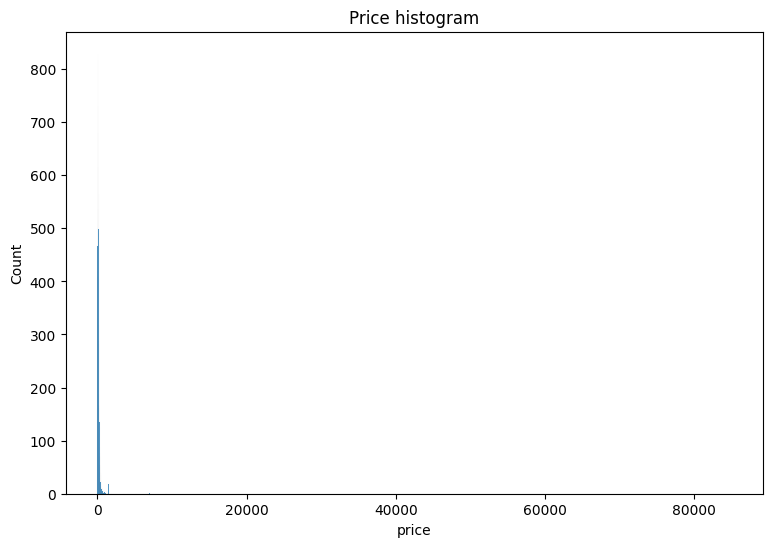

In [5]:
# Exploring the distribution of the price column

plt.subplots(figsize=(9, 6))
sns.histplot(data['price'])
plt.title('Price histogram')
plt.show()

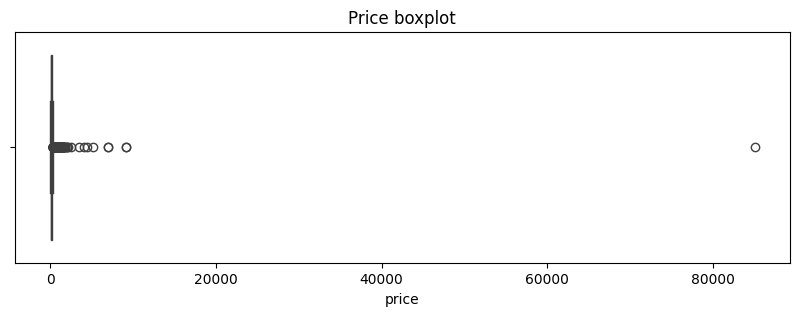

In [6]:
# Something is odd, let's try to identify extreme values with a boxplot

plt.subplots(figsize=(10, 3))
sns.boxplot(x=data['price'])
plt.title('Price boxplot')
plt.show()

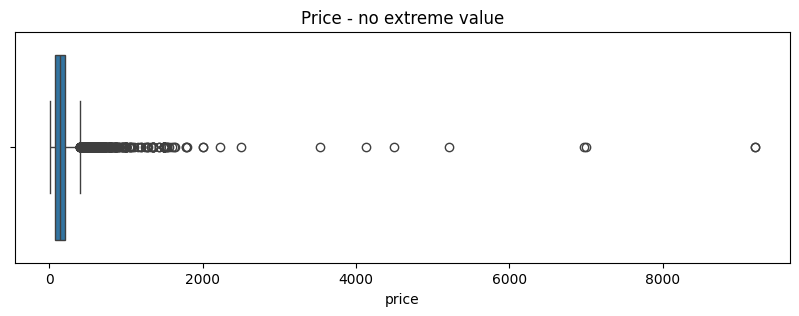

In [7]:
# We can see there is an extreme value, which after further investigation turns out to be an error in a listing that has since been removed, let's check it out again after removing that record

data_filtered = data[data['price'] < 80000]

plt.subplots(figsize=(10, 3))
sns.boxplot(x=data_filtered['price'])
plt.title('Price - no extreme value')
plt.show()

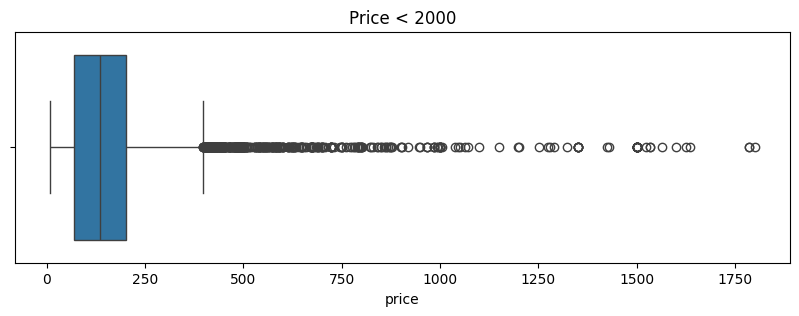

In [8]:
# This looks way better, but we still have some outliers, let's play with the filter to identify a good cutoff for our price

# Filter out records with price higher than 2000
data_filtered = data[data['price'] < 2000]

plt.subplots(figsize=(10, 3))
sns.boxplot(x=data_filtered['price'])
plt.title('Price < 2000')
plt.show()

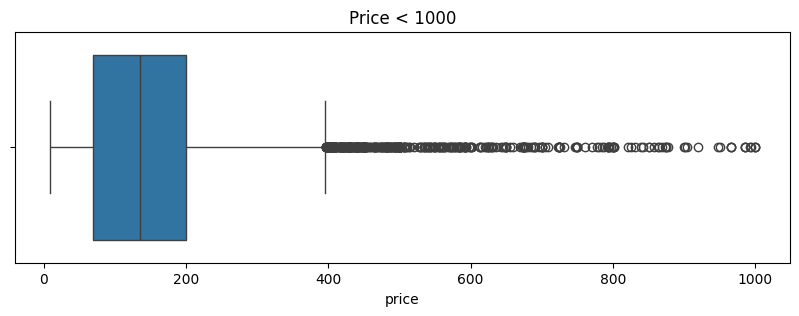

In [9]:
# We can still see some scattered values at the end of the right tail, let's filter out records with price higher than 1000
data_filtered = data[data['price'] < 1000]

plt.subplots(figsize=(10, 3))
sns.boxplot(x=data_filtered['price'])
plt.title('Price < 1000')
plt.show()

In [10]:
# The values are much closer to each other, let's find out how many rows we have lost in the process

rows_removed = data.shape[0] - data_filtered.shape[0]
print(f'Initial number of rows: {data.shape[0]}')
print(f'Final number of rows: {data_filtered.shape[0]}')
print(f'{rows_removed} rows were removed during the filtering')

Initial number of rows: 11731
Final number of rows: 11664
67 rows were removed during the filtering


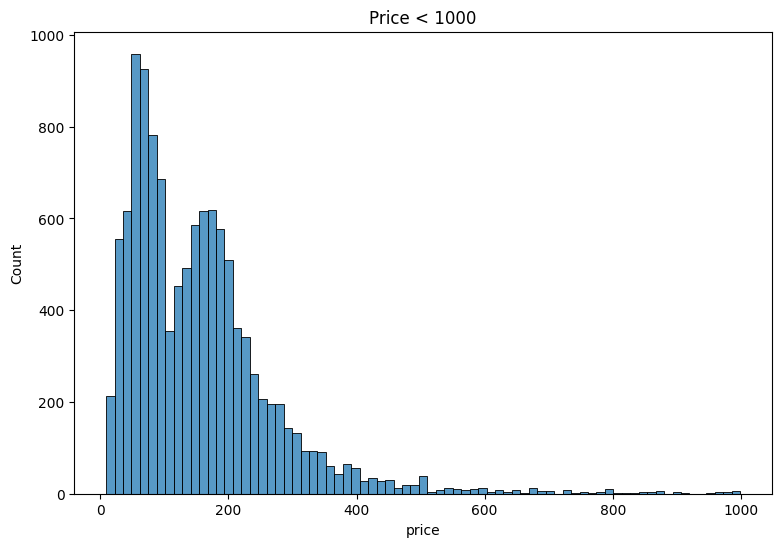

In [11]:
# Let's see the histogram of price now

plt.subplots(figsize=(9, 6))
sns.histplot(data_filtered['price'], bins=75)
plt.title('Price < 1000')
plt.show()

In [12]:
# We are mostly going to consider data_filtered for our analysis, since this way we get rid of extreme values that can distort our statistics, correlation metrics and future predictions, but let's see where most of the higher priced listings were placed

data[data['price'] >= 1000].groupby('neighbourhood_group_cleansed').size().sort_values(ascending=False)

neighbourhood_group_cleansed
Eixample               22
Ciutat Vella           11
Sant Marti             10
Gracia                  9
Sarria-Sant Gervasi     8
Sants-Montjuic          4
Horta-Guinardo          2
Nou Barris              1
dtype: int64

In [13]:
# Resetting index

data_filtered = data_filtered.reset_index(drop=True)

#### Neighbourhood centered analysis

In [14]:
# Overview of price and reviews by neighbourhood

neighbourhood_pivot = round(pd.pivot_table(data_filtered, index='neighbourhood_group_cleansed', values=['price', 'review_scores_rating'], aggfunc={'price': ['count', 'min', 'max', 'mean'], 'review_scores_rating': ['min', 'max', 'mean']}), 2)

neighbourhood_pivot.columns = ['count', 'price_max', 'price_mean', 'price_min', 'review_max', 'review_mean', 'review_min']

neighbourhood_pivot

,count,price_max,price_mean,price_min,review_max,review_mean,review_min
neighbourhood_group_cleansed,,,,,,,
Ciutat Vella,2544,999.00,133.03,16.00,5.00,4.54,0.00
Eixample,4374,999.00,188.53,10.00,5.00,4.58,0.00
Gracia,1033,992.00,150.84,13.00,5.00,4.54,0.00
Horta-Guinardo,336,600.00,89.94,15.00,5.00,4.51,1.00
Les Corts,224,535.00,139.89,21.00,5.00,4.59,2.50
Nou Barris,107,300.00,60.27,15.00,5.00,4.61,1.00
Sant Andreu,136,263.00,84.59,15.00,5.00,4.55,0.00
Sant Marti,1091,840.00,151.20,9.00,5.00,4.57,0.00
Sants-Montjuic,1268,966.00,122.79,14.00,5.00,4.54,1.00


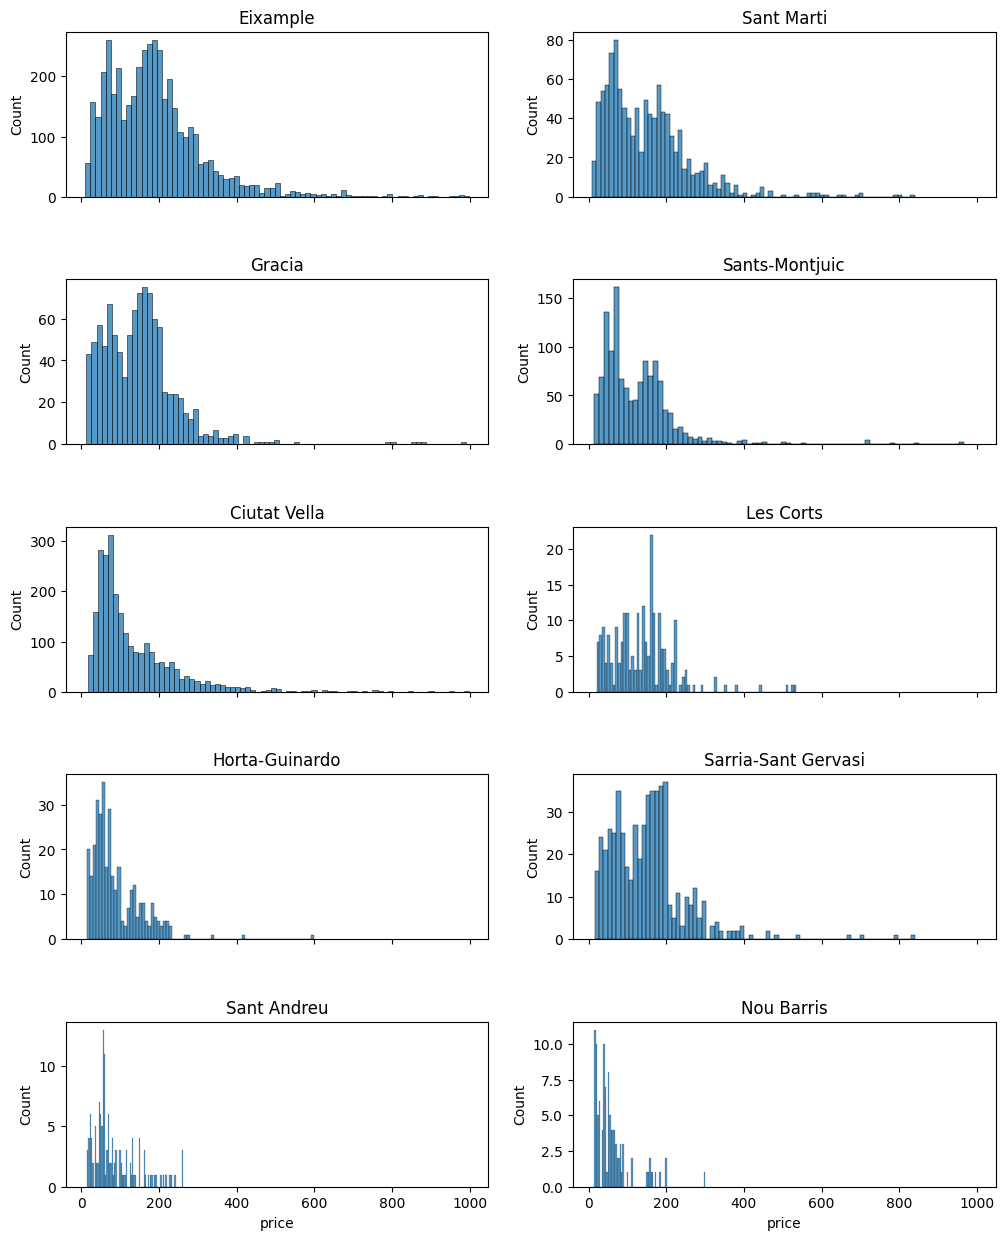

In [15]:
# Histograms of the price by neighbourhood

# Creating list with neighbourhood categories
neighbourhoods = [x for x in data['neighbourhood_group_cleansed'].unique()]

# Defining function to plot histograms
def plot_histograms(df, col_filter, col_plot, categories, bins=75, figsize=(12, 15), sharex=False, sharey=False):
    
    """
    Plot Seaborn histograms in a grid for different categories.
    Inputs:
    - df: DataFrame containing the data
    - col_filter: Column in the DataFrame for which the category filter will be done
    - col_plot: Column in the DataFrame for which histograms will be plotted
    - categories: List of unique values in the column for which histograms will be plotted
    - bins: Number of bins for histograms (default is 75)
    - figsize: size of the figure (default is 12, 25)
    """
    
    num_categories = len(categories)

    if num_categories == 2:
        fig, axes = plt.subplots(1, 2, figsize=figsize, sharex=sharex, sharey=sharey)
    else:
        num_rows = num_categories // 2
        num_cols = 2 if num_categories % 2 == 0 else 1

        fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize, sharex=sharex, sharey=sharey)
        fig.subplots_adjust(hspace=0.5)

    for i, category in enumerate(categories):
        if num_categories == 2:
            sns.histplot(df[df[col_filter] == category][col_plot], bins=bins, ax=axes[i])
            axes[i].set_title(category)
        else:
            sns.histplot(df[df[col_filter] == category][col_plot], bins=bins, ax=axes[i // 2, i % 2])
            axes[i // 2, i % 2].set_title(category)

    plt.show()

plot_histograms(df=data_filtered, col_filter='neighbourhood_group_cleansed', col_plot='price', categories=neighbourhoods, sharex=True)

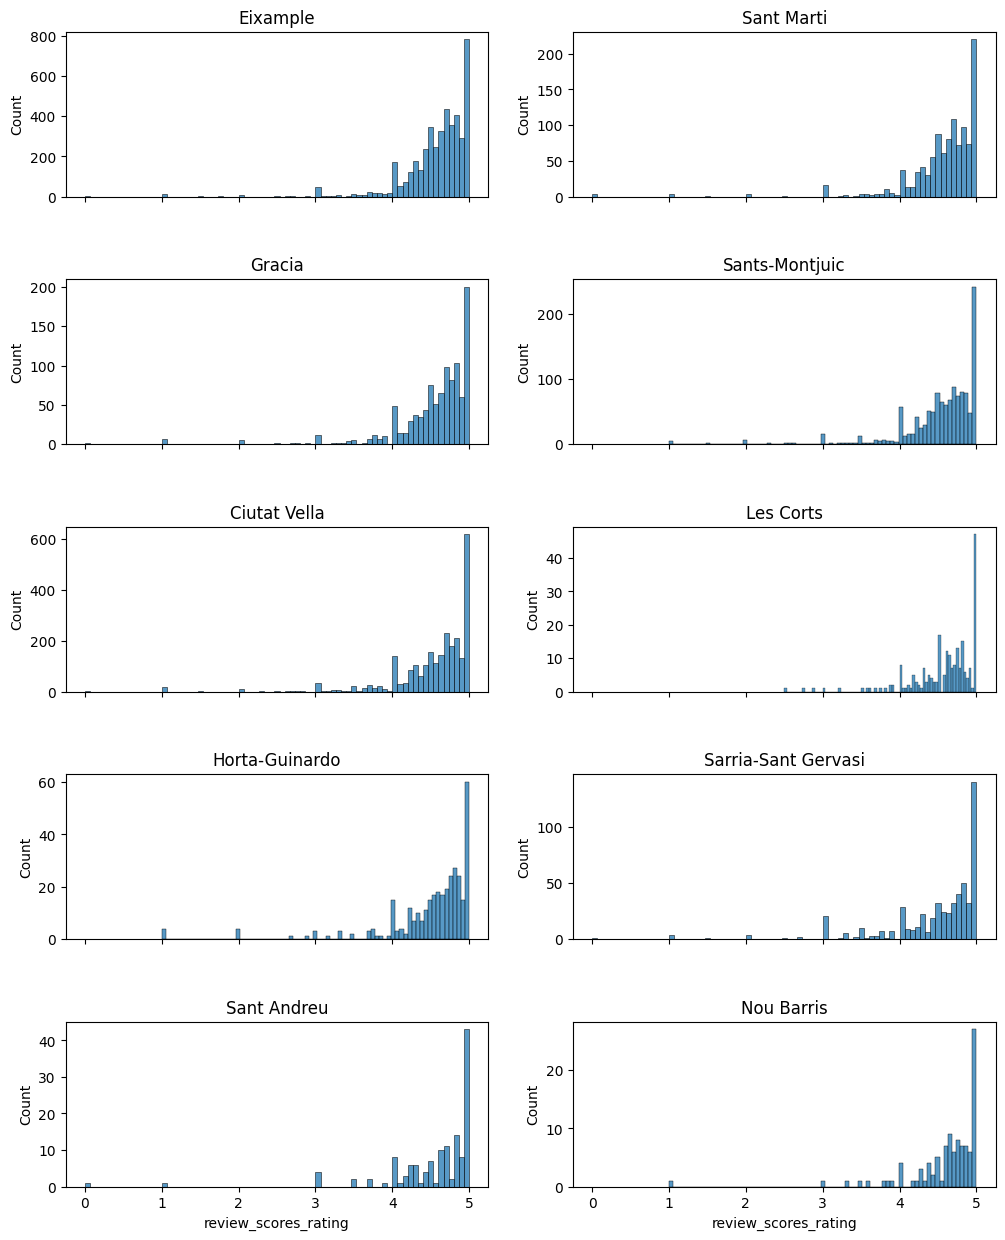

In [16]:
# Histograms of ratings by neighbourhood

plot_histograms(df=data_filtered, col_filter='neighbourhood_group_cleansed', col_plot='review_scores_rating', categories=neighbourhoods, sharex=True)

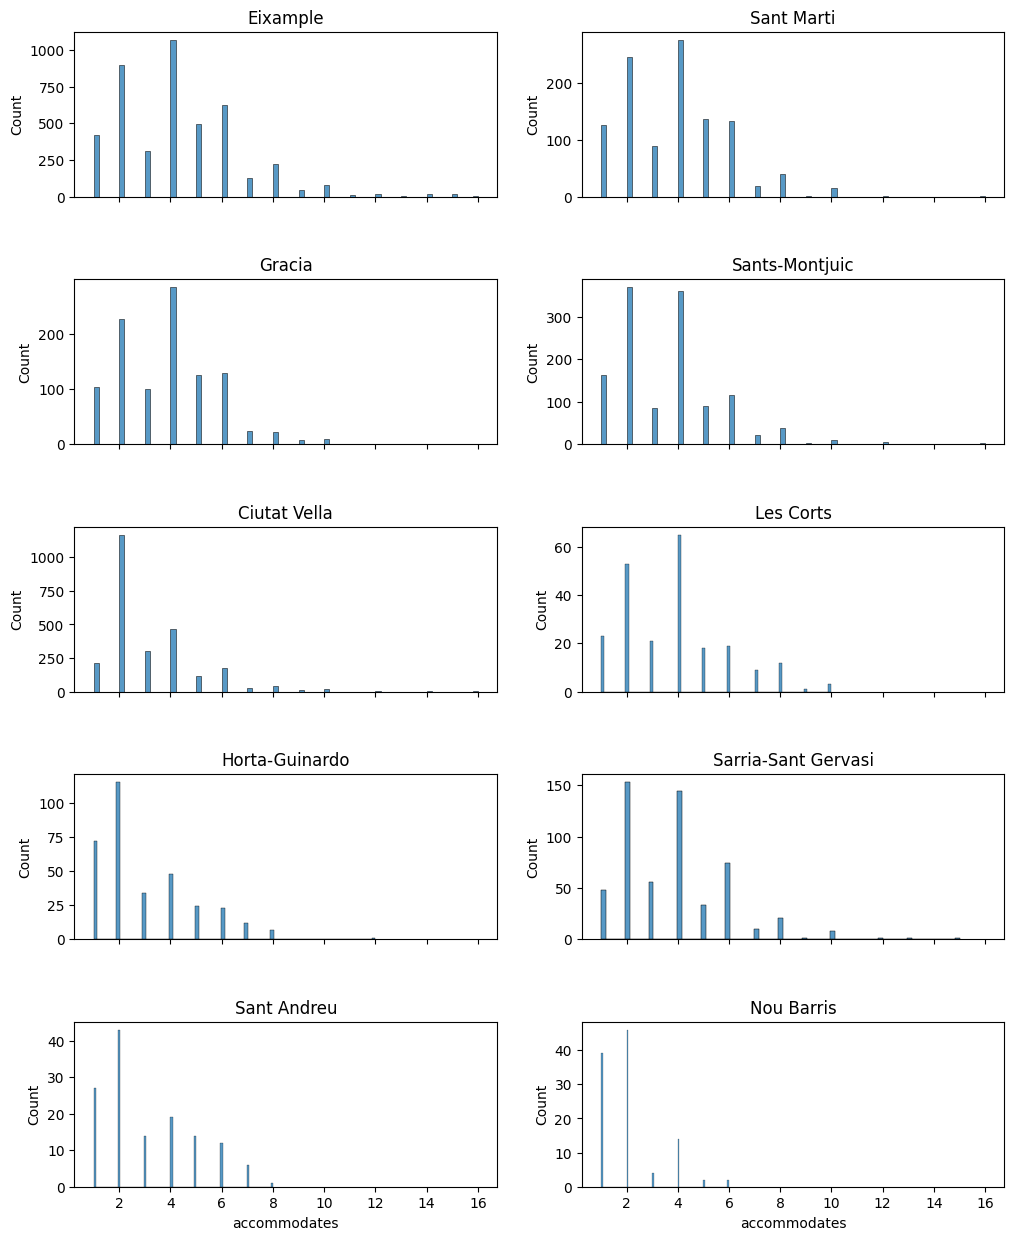

In [17]:
# Histograms of accommodates by neighbourhood

plot_histograms(df=data_filtered, col_filter='neighbourhood_group_cleansed', col_plot='accommodates', categories=neighbourhoods, sharex=True)

#### Room type centered analysis

In [18]:
roomtype_pivot = round(pd.pivot_table(data_filtered, index='room_type', values=['price', 'review_scores_rating'], aggfunc={'price': ['count', 'min', 'max', 'mean'], 'review_scores_rating': ['min', 'max', 'mean']}), 2)

roomtype_pivot.columns = ['count', 'price_max', 'price_mean', 'price_min', 'review_max', 'review_mean', 'review_min']

roomtype_pivot

,count,price_max,price_mean,price_min,review_max,review_mean,review_min
room_type,,,,,,,
Entire home/apt,8095,999.00,183.33,10.00,5.00,4.55,0.00
Hotel room,94,726.00,208.15,22.00,5.00,4.62,1.00
Private room,3370,999.00,85.47,9.00,5.00,4.57,0.00
Shared room,105,985.00,107.83,15.00,5.00,4.51,3.00


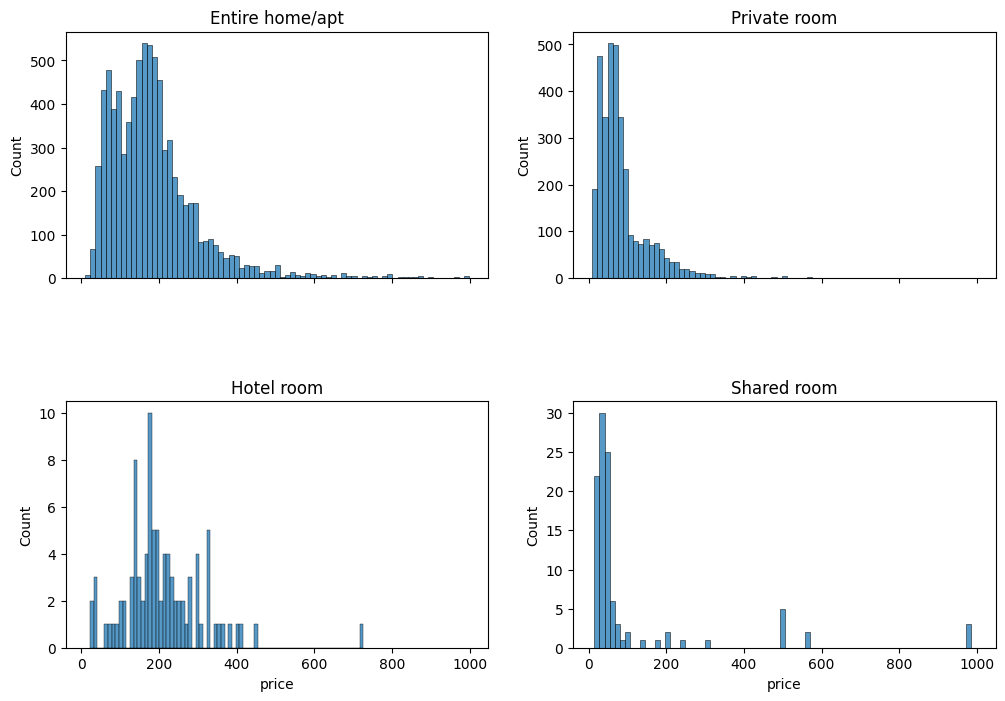

In [19]:
# Histograms of the price by neighbourhood

room_types = [x for x in data_filtered['room_type'].unique()]

plot_histograms(df=data_filtered, col_filter='room_type', col_plot='price', categories=room_types, figsize=(12, 8), sharex=True)

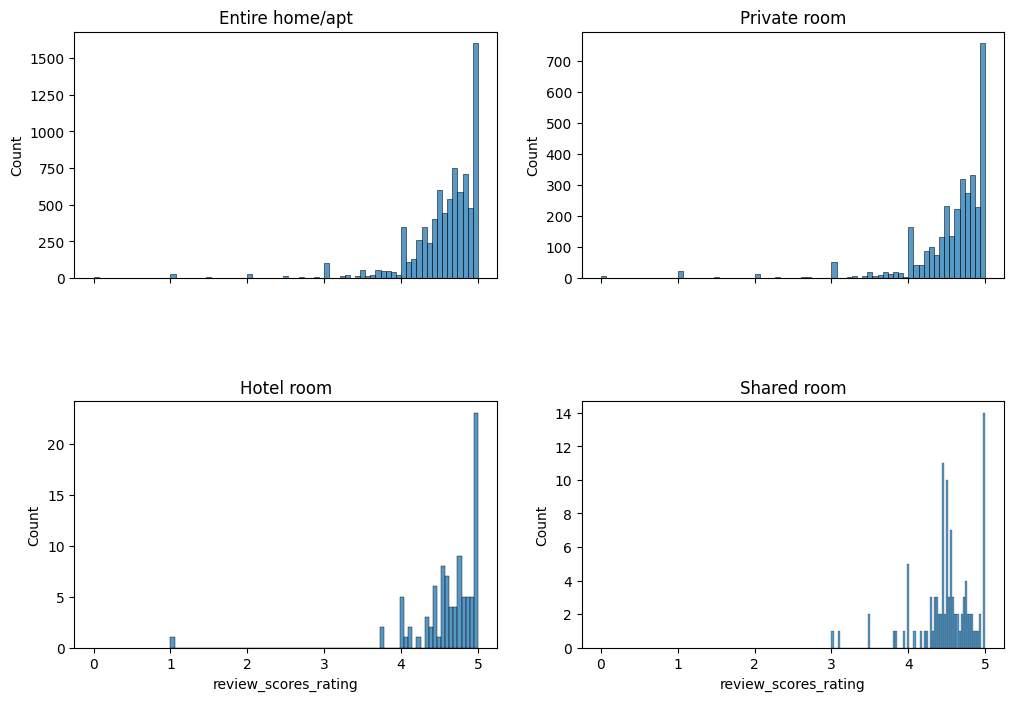

In [20]:
plot_histograms(df=data_filtered, col_filter='room_type', col_plot='review_scores_rating', categories=room_types, figsize=(12, 8), sharex=True)

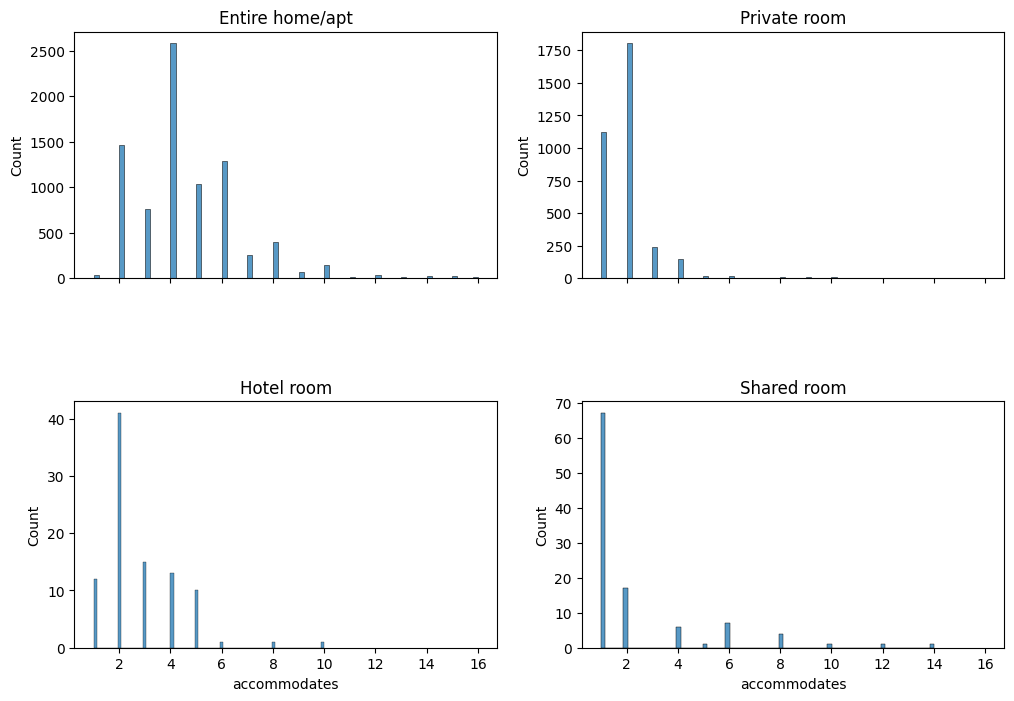

In [21]:
# Histograms of accommodates by room_type

plot_histograms(df=data_filtered, col_filter='room_type', col_plot='accommodates', categories=room_types, figsize=(12, 8), sharex=True)

#### Host type centered analysis

In [22]:
superhost_pivot = round(pd.pivot_table(data_filtered, index='host_is_superhost', values=['price', 'review_scores_rating'], aggfunc={'price': ['count', 'min', 'max', 'mean'], 'review_scores_rating': ['min', 'max', 'mean']}), 2)

superhost_pivot.columns = ['count', 'price_max', 'price_mean', 'price_min', 'review_max', 'review_mean', 'review_min']

superhost_pivot

,count,price_max,price_mean,price_min,review_max,review_mean,review_min
host_is_superhost,,,,,,,
f,8835,999.00,151.24,9.00,5.00,4.47,0.00
t,2829,999.00,165.01,13.00,5.00,4.83,1.00


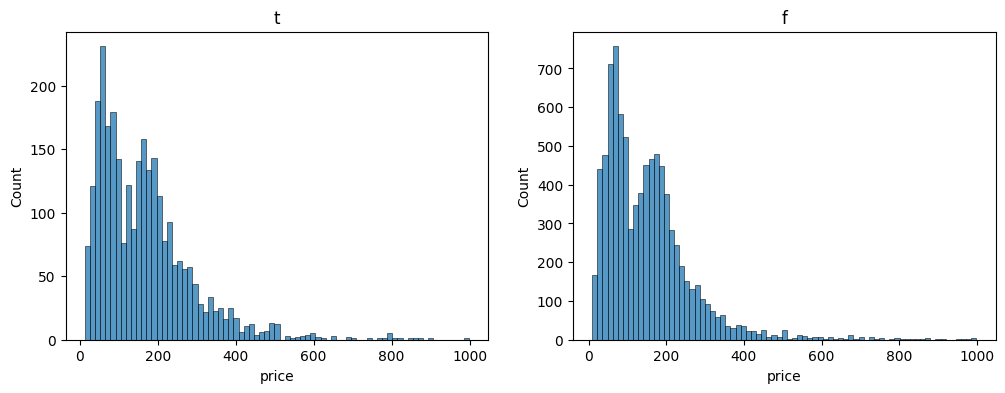

In [23]:
host_types = ['t', 'f']

plot_histograms(df=data_filtered, col_filter='host_is_superhost', col_plot='price', categories=host_types, figsize=(12, 4))

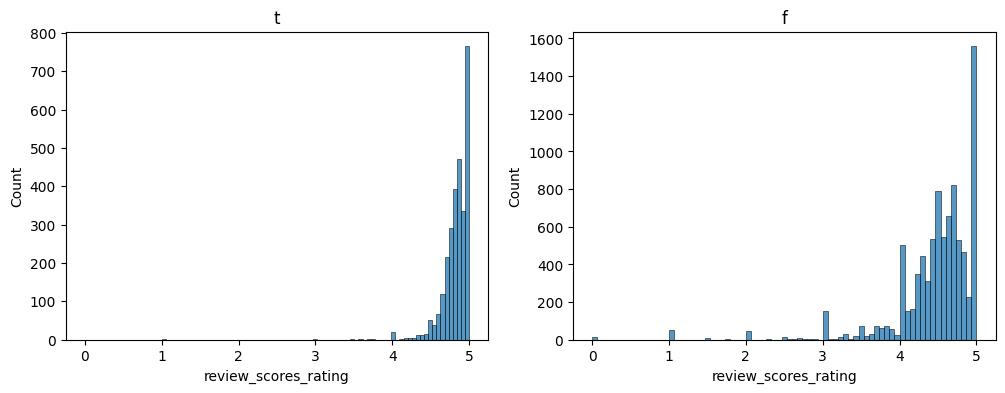

In [24]:
plot_histograms(df=data_filtered, col_filter='host_is_superhost', col_plot='review_scores_rating', categories=host_types, figsize=(12, 4), sharex=True)

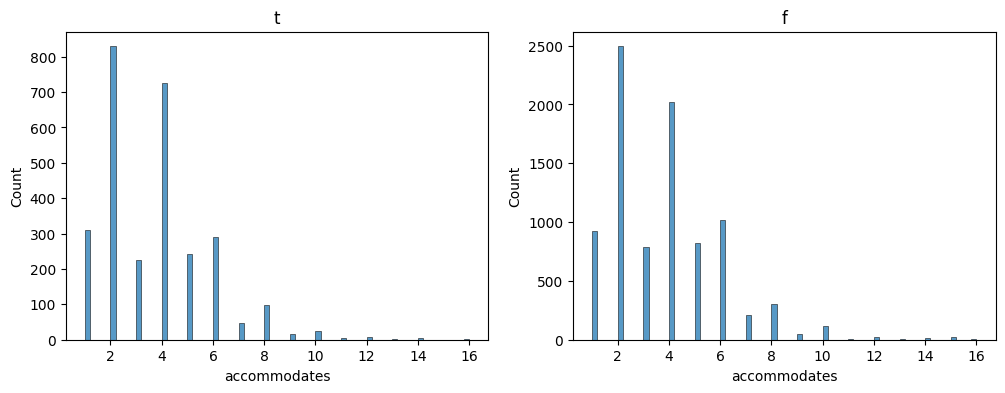

In [25]:
plot_histograms(df=data_filtered, col_filter='host_is_superhost', col_plot='accommodates', categories=host_types, figsize=(12, 4))

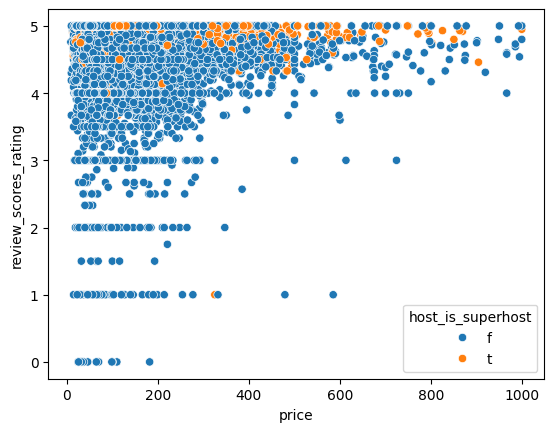

In [26]:
# Scatterplot of several variables with price to look at possible linear correlation

sns.scatterplot(data=data_filtered, x='price', y='review_scores_rating', hue='host_is_superhost')
plt.show()

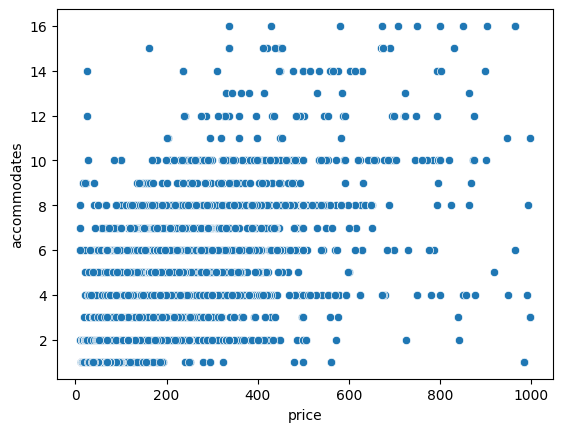

In [27]:
# Scatterplot of several variables with price to look at possible linear correlation

sns.scatterplot(data=data_filtered, x='price', y='accommodates')
plt.show()

#### How long, on average, takes hosts to receive its first review?

In [28]:
# How long does it take to get a first review

date_diff = data['first_review'] - data['host_since']
mean_date_diff = date_diff.mean().days

mean_date_diff_years = round(mean_date_diff / 365.25, 2)
print(f'On average, it takes {mean_date_diff_years} years for a host to receive his/her first review.')

On average, it takes 3.63 years for a host to receive his/her first review.


In [29]:
# Splitting dataframe into numerical and categorical columns

data_num = data_filtered.select_dtypes(include='number')
data_cat = data_filtered.select_dtypes(include='object')

In [30]:
# Defining function to create histograms of all the numerical columns

def make_histograms(df: pd.DataFrame, figsize=(12, 15)):
    
    """
    Takes a dataframe and creates histograms for all the columns.
    Parameters:
    - df: DataFrame
    - figsize: Modifies the size of the plotting figure (default (12, 15))
    """
    
    num_cols = 2
    total_cols = len(df.columns)
    num_rows = (total_cols + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    fig.subplots_adjust(hspace=0.5)

    for i, col in enumerate(df.columns):
        row_idx = i // num_cols
        col_idx = i % num_cols
        sns.histplot(x=df[col], data=df, ax=axes[row_idx, col_idx]) 
        axes[row_idx, col_idx].set_title(col)

    plt.show()

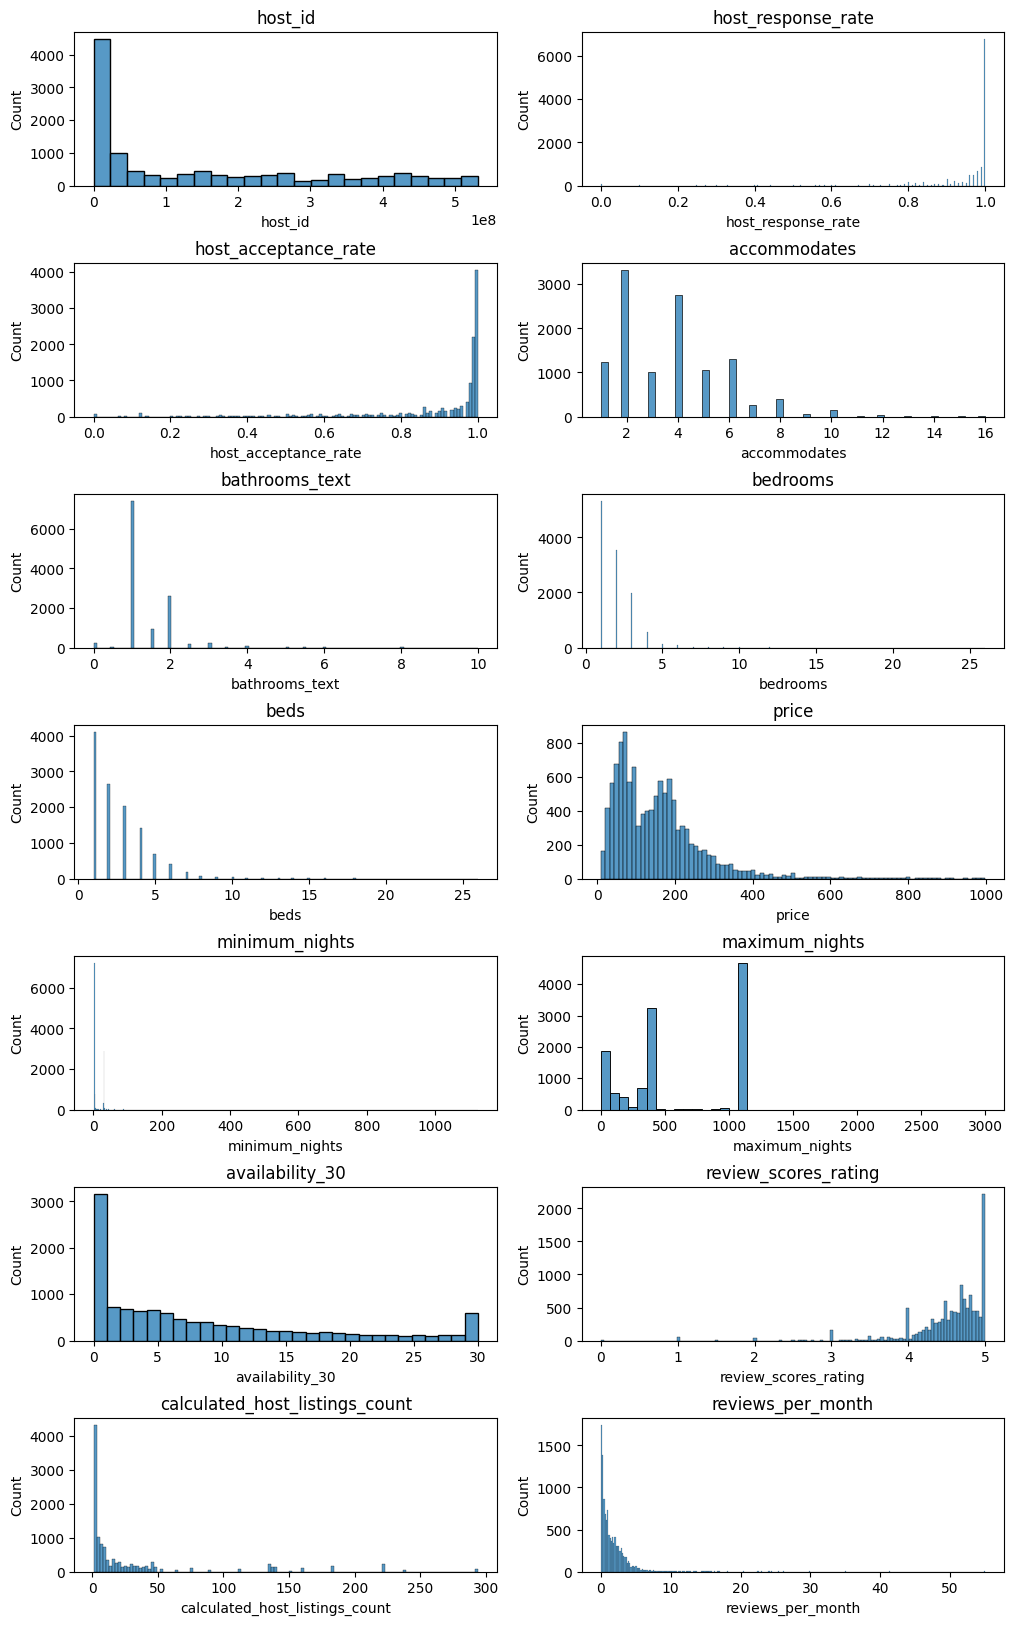

In [31]:
make_histograms(data_num, figsize=(12, 20))

In [32]:
# Calculating skewness of numerical columns

def compute_skewness(df: pd.DataFrame, threshold: int=-1):
    
    '''
    Computes and prints the skewness of the columns in a dataframe.
    Inputs: pandas DataFrame
    '''
    
    print('Skewness of columns in the dataframe:\n')
    
    for col in df.columns:
        if st.skew(df[col]) > abs(threshold) or st.skew(df[col]) < threshold:
            print(f'{col}: {round(st.skew(df[col]), 2)} -> Out of threshold')
        else:
            print(f'{col}: {round(st.skew(df[col]), 2)}')


compute_skewness(data_num)

Skewness of columns in the dataframe:

host_id: 0.82
host_response_rate: -4.74 -> Out of threshold
host_acceptance_rate: -2.95 -> Out of threshold
accommodates: 1.31 -> Out of threshold
bathrooms_text: 2.59 -> Out of threshold
bedrooms: 2.84 -> Out of threshold
beds: 2.23 -> Out of threshold
price: 2.15 -> Out of threshold
minimum_nights: 20.88 -> Out of threshold
maximum_nights: 0.19
availability_30: 1.08 -> Out of threshold
review_scores_rating: -3.35 -> Out of threshold
calculated_host_listings_count: 2.76 -> Out of threshold
reviews_per_month: 5.82 -> Out of threshold


In [33]:
# Main summary statistics of the numerical variables

round(data_num.describe(), 2).T

,count,mean,std,min,25%,50%,75%,max
host_id,11664.00,151709475.76,168734089.13,10704.00,6299958.00,63229593.00,270258032.00,531957009.00
host_response_rate,11664.00,0.95,0.12,0.00,0.97,1.00,1.00,1.00
host_acceptance_rate,11664.00,0.91,0.17,0.00,0.91,0.99,1.00,1.00
accommodates,11664.00,3.73,2.19,1.00,2.00,4.00,5.00,16.00
bathrooms_text,11664.00,1.34,0.65,0.00,1.00,1.00,2.00,10.00
bedrooms,11664.00,1.89,1.11,1.00,1.00,2.00,2.00,26.00
beds,11664.00,2.60,1.85,1.00,1.00,2.00,3.00,26.00
price,11664.00,154.58,116.18,9.00,70.00,135.00,200.00,999.00
minimum_nights,11664.00,11.89,23.17,1.00,1.00,3.00,31.00,1125.00
maximum_nights,11664.00,599.52,450.58,1.00,299.75,365.00,1125.00,3000.00


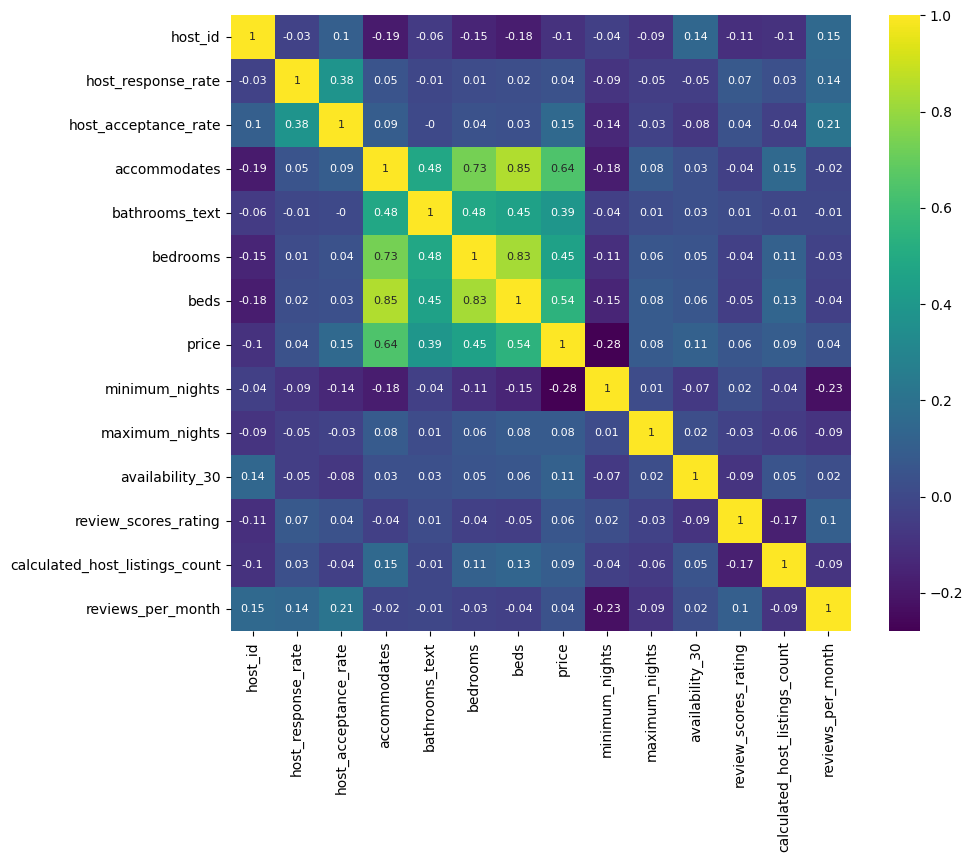

In [34]:
# Correlation matrix

corr_matrix = round(data_num.corr(), 2)

plt.figure(figsize=(10,8))

corr_matrix_display = sns.heatmap(corr_matrix, cmap='viridis', annot=True, annot_kws={"size": 8})

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Defining a function to compute the vif to identify possible multicolinearity issues

def compute_vif(df: pd.DataFrame, columns: list):

    X = df.loc[:, columns]
    # the calculation of variance inflation requires a constant
    X.loc[:,'intercept'] = 1

    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.loc[vif['Variable']!='intercept'].sort_values('VIF', ascending=False).reset_index(drop=True)
    return vif

In [36]:
# Computing multicolinearity between columns

# Columns to consider
data_num_vif = data_num.copy()
selected_columns = list(data_num_vif.columns)
selected_columns.remove('price')

# compute vif
vif_df = compute_vif(data_num_vif, selected_columns)
display(vif_df)

,Variable,VIF
0,beds,5.32
1,accommodates,3.87
2,bedrooms,3.41
3,bathrooms_text,1.40
4,host_acceptance_rate,1.25
5,host_response_rate,1.19
6,reviews_per_month,1.14
7,host_id,1.13
8,minimum_nights,1.11
9,calculated_host_listings_count,1.09


In [37]:
# This time removing the beds column

# Columns to consider
data_num_vif = data_num_vif.drop(columns='beds')
selected_columns = list(data_num_vif.columns)
selected_columns.remove('price')

# compute vif
vif_df = compute_vif(data_num_vif, selected_columns)
display(vif_df)

,Variable,VIF
0,accommodates,2.44
1,bedrooms,2.29
2,bathrooms_text,1.39
3,host_acceptance_rate,1.25
4,host_response_rate,1.19
5,reviews_per_month,1.14
6,host_id,1.13
7,minimum_nights,1.11
8,calculated_host_listings_count,1.09
9,review_scores_rating,1.07


In [38]:
# The conclusion is to drop the beds column, since it appears to be highly correlated to other numerical variables

data_num = data_num.drop(columns='beds')
data_filtered = data_filtered.drop(columns='beds')

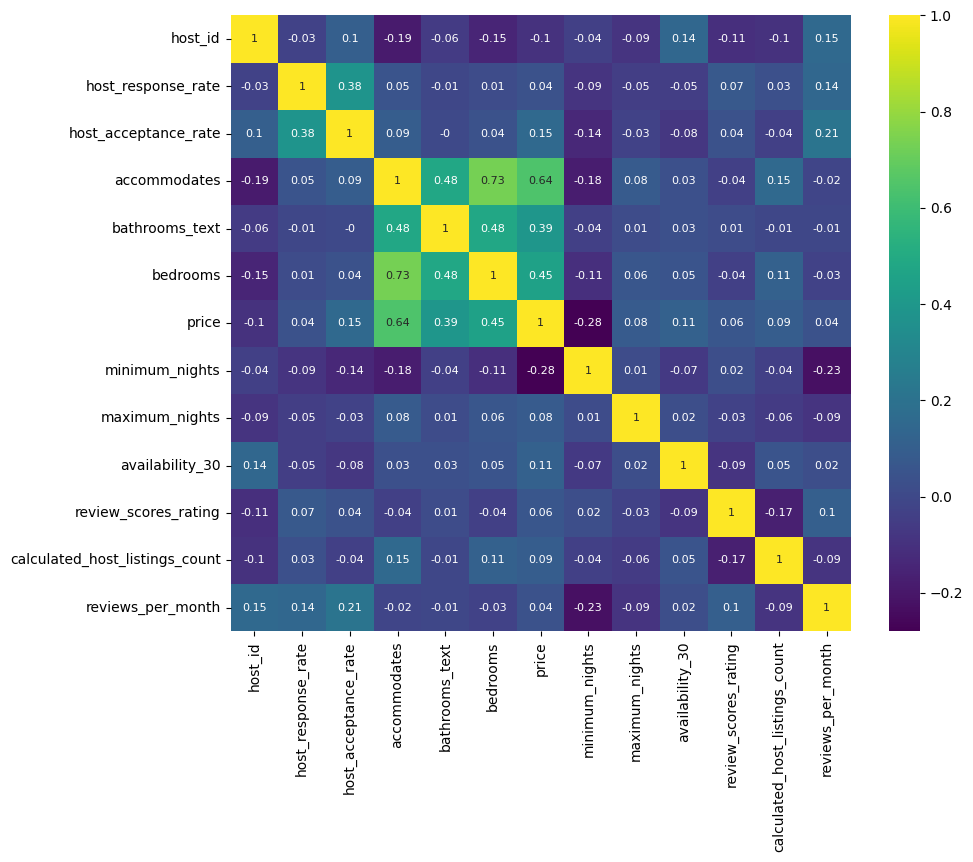

In [39]:
# Plotting the new correlation matrix

corr_matrix = round(data_num.corr(), 2)

plt.figure(figsize=(10,8))

corr_matrix_display = sns.heatmap(corr_matrix, cmap='viridis', annot=True, annot_kws={"size": 8})

In [40]:
# Main summary statistics of the categorical variables

data_cat.describe().T

,count,unique,top,freq
host_response_time,11664,4,within an hour,8957
host_is_superhost,11664,2,f,8835
host_has_profile_pic,11664,2,t,11540
host_identity_verified,11664,2,t,11383
neighbourhood_group_cleansed,11664,10,Eixample,4374
room_type,11664,4,Entire home/apt,8095
has_availability,11664,2,t,11619
instant_bookable,11664,2,f,6364


In [41]:
# Defining function to plot countplots

def make_countplots(df: pd.DataFrame, figsize=(12, 15)):
    
    """
    Takes a dataframe and creates countplots for all the columns.
    If the column has more than 5 categories, the data goes in the y axis.
    Bars are arranged in descending order based on count.
    Parameters:
    - df: DataFrame
    - figsize: Modifies the size of the plotting figure (default (12, 15))
    """
    
    num_cols = 2
    total_cols = len(df.columns)
    num_rows = (total_cols + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    fig.subplots_adjust(hspace=0.5)

    for i, col in enumerate(df.columns):
        row_idx = i // num_cols
        col_idx = i % num_cols

        if df[col].nunique() > 5:
            order = df[col].value_counts().index
            sns.countplot(y=df[col], data=df, ax=axes[row_idx, col_idx], hue=df[col], palette='Set2', order=order)
        else:
            order = df[col].value_counts().index
            sns.countplot(x=df[col], data=df, ax=axes[row_idx, col_idx], hue=df[col], palette='Set2', order=order)

        axes[row_idx, col_idx].set_title(col)
        axes[row_idx, col_idx].set_xlabel('Count' if df[col].nunique() <= 5 else 'Frequency')
        axes[row_idx, col_idx].set_ylabel('Categories' if df[col].nunique() > 5 else 'Count')

    plt.show()

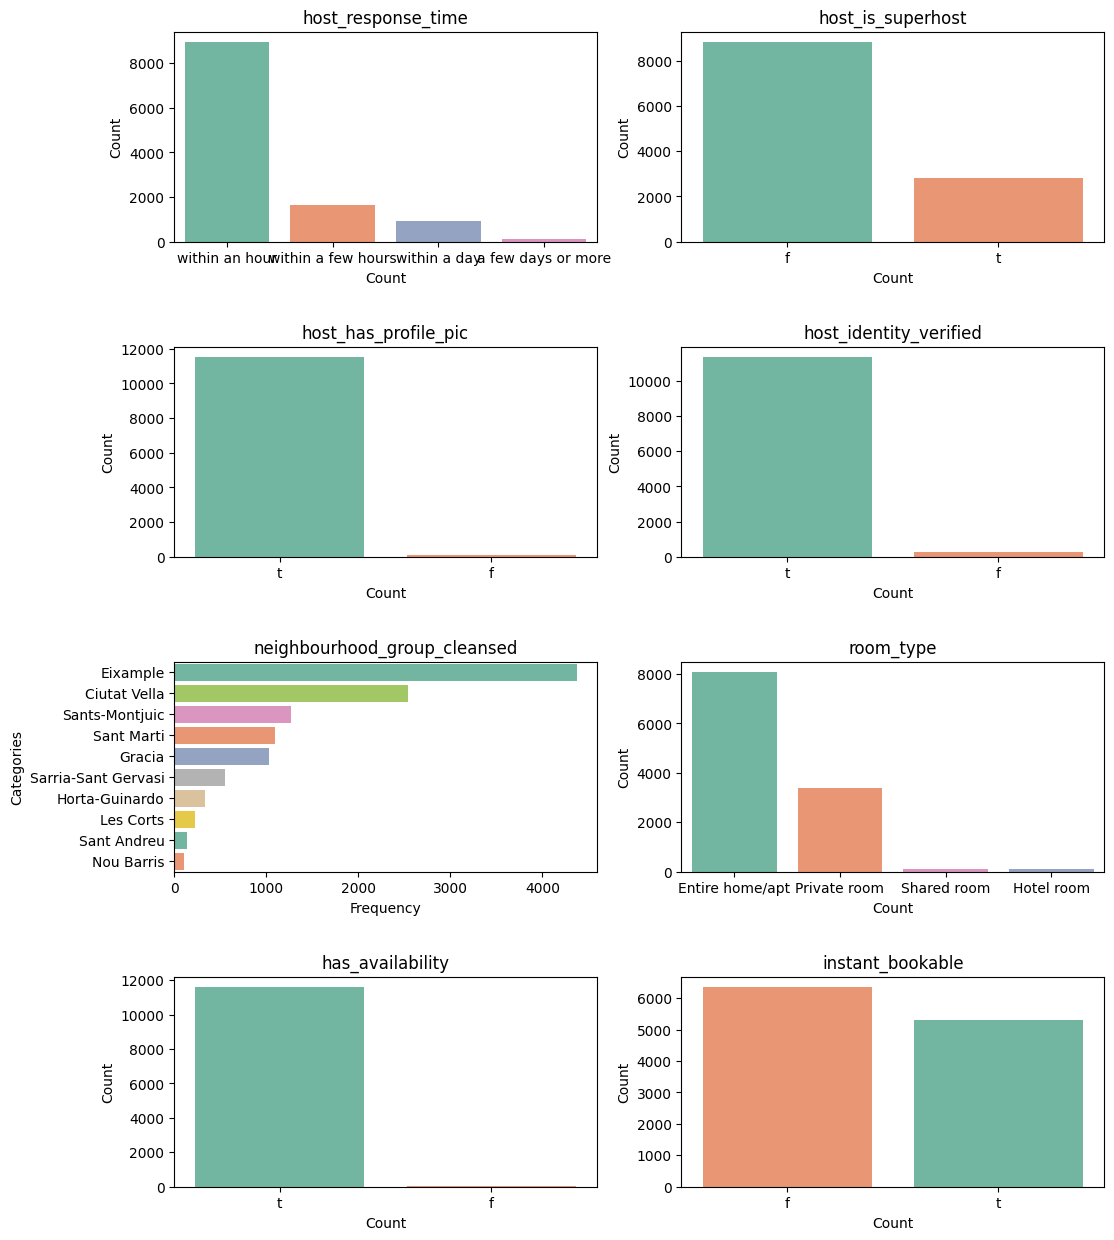

In [42]:
# Creating countplots for the categorical columns

make_countplots(data_cat)

In [43]:
# Calculating the average number of listings per host id

data_filtered['host_id'].nunique()

round(len(data_filtered) / data_filtered['host_id'].nunique(), 2)

2.95

In [44]:
# Top 20 hosts by number of listings

data_filtered['host_id'].value_counts().sort_values(ascending=False).head(20)

host_id
32037490     220
4459553      167
299462       139
158023606    126
265193861    111
1391607      107
1447144       92
346367515     81
396363        67
47171261      59
436641358     53
357946540     51
9400556       46
370718107     45
10547296      45
33278356      43
35936647      43
434893527     42
2439400       41
130223809     40
Name: count, dtype: int64

## 4. Hypothesis testing

#### We can see Eixample has the most listings out of all the neighbourhoods, can we determine if the mean pricing of Eixample is representative of the whole dataset with a 95% significance level

In [45]:
# H0: Eixample mean price = population mean price
# Ha: Eixample mean price != population mean price

pop_mean = data_filtered['price'].mean()
eix_price = data_filtered[data_filtered['neighbourhood_group_cleansed'] == 'Eixample']['price']
eix_mean = eix_price.mean()

print(pop_mean)
print(eix_mean)

154.5787037037037
188.53360768175583


In [46]:
# Using scipy t-test

alpha = 0.05
stat, pval = st.ttest_1samp(eix_price, popmean=pop_mean, alternative='two-sided')
print('t-statistic: {:.3f}'.format(stat))
print('p-value: {:.3f}'.format(pval))

if pval > (alpha / 2):
    print('Accept null hypothesis: The mean price of Eixample is representative of the population mean.')
else:
    print('Reject null hypothesis: The mean price of Eixample is not representative of the population mean.')

t-statistic: 17.666
p-value: 0.000
Reject null hypothesis: The mean price of Eixample is not representative of the population mean.


In [47]:
# Manual calculation using the statistic method

stat = (eix_mean - pop_mean) / (np.std(eix_price, ddof=1) / np.sqrt(len(eix_price)))
print('The value of the statistic is: {:.3f}'.format(stat))

lower_critical_value, upper_critical_value = st.t.ppf((0.05/2), df=len(eix_price)-1), st.t.ppf(1-(0.05/2), df=len(eix_price)-1)
print("The lower critical value is {:.3f}".format(lower_critical_value))
print("The upper critical value is {:.3f}".format(upper_critical_value))

if stat < lower_critical_value or stat > upper_critical_value:
    print('The statistic doesnt fall within the critical value boundaries, therefore we reject the null hypothesis.')
else:
    print('The statistic falls within the critical value boundaries, therefore we accept the null hypothesis.')

The value of the statistic is: 17.666
The lower critical value is -1.961
The upper critical value is 1.961
The statistic doesnt fall within the critical value boundaries, therefore we reject the null hypothesis.


In [48]:
# We can see that both methods yield the same result

#### Extreme pricing related to availability

In [49]:
# Creating dataframes for listings priced higher and lower a certain threshold

data_highest_prices = data[(data['price'] >= 1000) & (data['price'] < 80000)]
data_other = data[(data['price'] < 1000)]

# Calculating mean 30-day availability for the previous dataframes

print(data_highest_prices['availability_30'].mean())
print(data_other['availability_30'].mean())

15.363636363636363
8.40886488340192


In [50]:
# Creating dataframes for listings priced higher and lower a certain threshold

data_highest_prices = data[(data['price'] >= 500) & (data['price'] < 80000)]
data_other = data[(data['price'] < 500)]

# Calculating mean 30-day availability for the previous dataframes

print(data_highest_prices['availability_30'].mean())
print(data_other['availability_30'].mean())

12.84115523465704
8.341744521086179


#### Are the neighbourhood and the room_type related? With a significance of 95%

In [51]:
# H0: Neighbourhood and room type are not related
# Ha: Neighbourhood and room type are related

In [52]:
# Getting a crosstab of our data

crosstab = pd.crosstab(data['neighbourhood_group_cleansed'], data['room_type'])
crosstab

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood_group_cleansed,,,,
Ciutat Vella,1596,22,935,2
Eixample,3245,50,1043,58
Gracia,795,10,221,16
Horta-Guinardo,177,0,161,0
Les Corts,177,0,44,3
Nou Barris,32,0,76,0
Sant Andreu,79,0,56,1
Sant Marti,783,1,305,12
Sants-Montjuic,848,10,404,10


In [53]:
# Calculating degrees of freedom

degrees_of_freedom = (crosstab.shape[0] - 1) * (crosstab.shape[1] - 1)
print(f'Degrees of freedom: {degrees_of_freedom}')

critical_value = st.chi2.ppf(1-alpha, df=degrees_of_freedom)
print("The critical value that corresponds to an alpha of 0.05 is: {:.3f}".format(critical_value))

Degrees of freedom: 27
The critical value that corresponds to an alpha of 0.05 is: 40.113


In [54]:
# Using chi2 test from Scipy

chi2, pval, dof, expected_freq_array = st.chi2_contingency(crosstab)
print('chi2: {:.3f}'.format(chi2))
print('p-value: {:.3f}'.format(pval))
print(f'dof: {dof}')

chi2: 388.248
p-value: 0.000
dof: 27


In [55]:
# Test conclusions

if chi2 > critical_value:
    print('chi2 statistic is higher than the critical value, therefore we reject H0 -> neighbourhood and room type are related')
else:
    print('chi2 statistic is higher than the critical value, therefore we accept H0 -> neighbourhood and room type are not related')

chi2 statistic is higher than the critical value, therefore we reject H0 -> neighbourhood and room type are related


## 5. Data preprocessing

In [56]:
# Selecting variables to include in the model, based on correlation with the target variable and domain knowledge

data_selected_cols = data_filtered[['host_is_superhost', 'neighbourhood_group_cleansed', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'price', 'minimum_nights', 'review_scores_rating', 'availability_30', 'reviews_per_month']]

data_selected_cols

,host_is_superhost,neighbourhood_group_cleansed,room_type,accommodates,bathrooms_text,bedrooms,price,minimum_nights,review_scores_rating,availability_30,reviews_per_month
0,f,Eixample,Entire home/apt,8,2.00,3.00,202.00,1,4.30,4,0.30
1,t,Sant Marti,Entire home/apt,5,2.00,3.00,255.00,3,4.77,16,0.48
2,f,Eixample,Entire home/apt,8,2.00,3.00,331.00,2,4.55,0,0.33
3,f,Gracia,Entire home/apt,6,1.50,2.00,171.00,21,4.46,6,0.64
4,f,Eixample,Entire home/apt,8,2.50,3.00,333.00,2,4.56,0,0.34
...,...,...,...,...,...,...,...,...,...,...,...
11659,t,Eixample,Private room,2,1.00,1.00,105.00,1,5.00,10,2.00
11660,t,Eixample,Private room,2,1.00,1.00,116.00,1,4.50,2,2.00
11661,f,Sants-Montjuic,Private room,2,1.00,1.00,52.00,1,5.00,23,1.00
11662,t,Ciutat Vella,Private room,2,1.00,1.00,116.00,1,5.00,25,1.00


In [57]:
# X and y

y = data_selected_cols['price']
X = data_selected_cols.drop(columns='price')

In [58]:
# Train-test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9331, 10)
(2333, 10)
(9331,)
(2333,)


In [59]:
# Splitting X_train and y_train into numerical and categorical dataframes

X_train_num = X_train.select_dtypes(include='number')
X_train_cat = X_train.select_dtypes(include='object')

X_test_num = X_test.select_dtypes(include='number')
X_test_cat = X_test.select_dtypes(include='object')

Let's start with the numerical columns

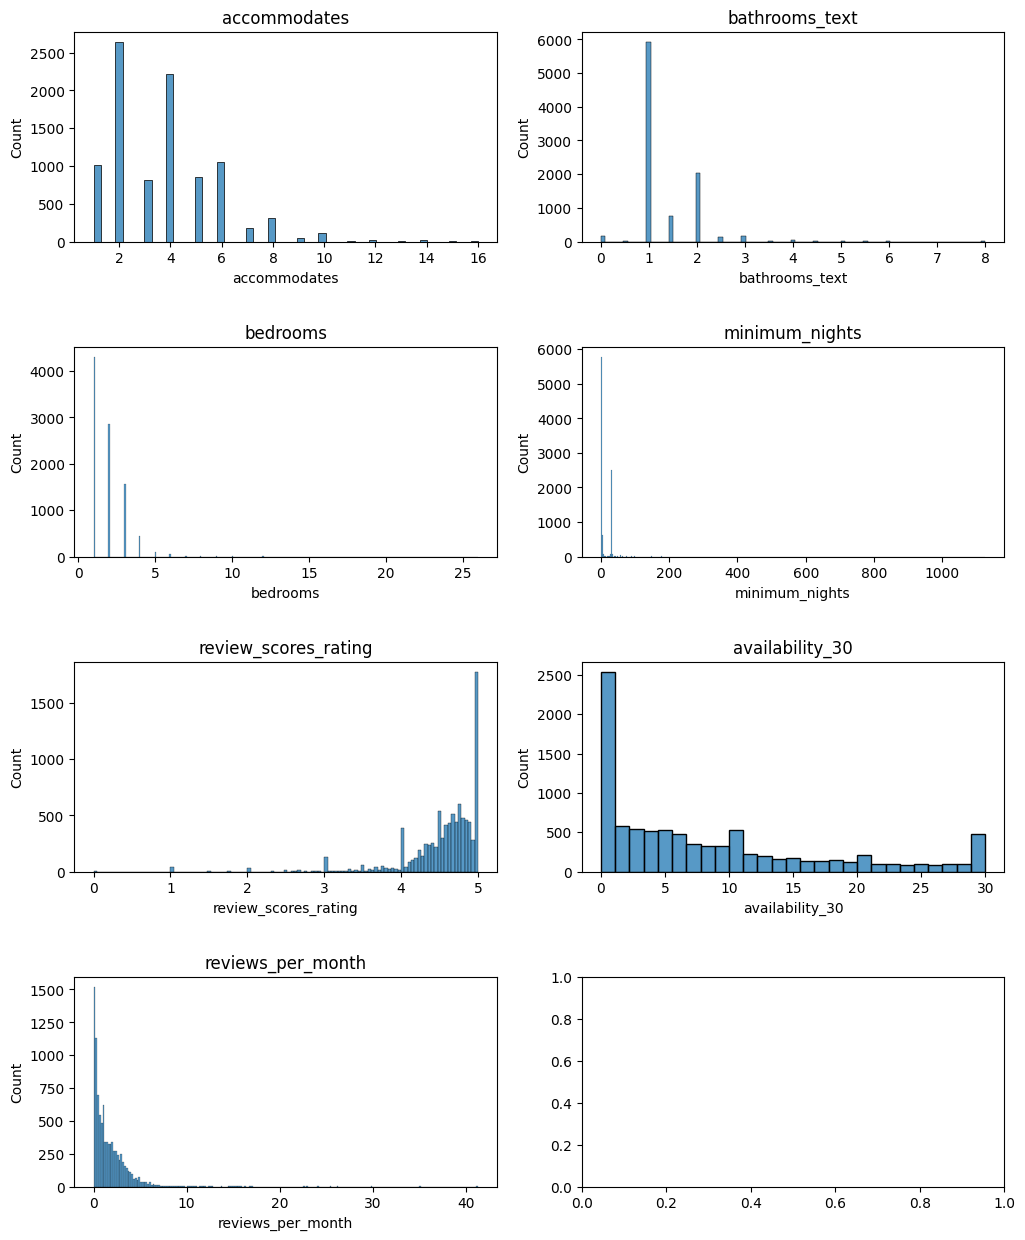

In [60]:
# Having a loot at the distributions of the numerical variables

make_histograms(X_train_num)

In [61]:
# Skewness

compute_skewness(X_train_num)

Skewness of columns in the dataframe:

accommodates: 1.3 -> Out of threshold
bathrooms_text: 2.48 -> Out of threshold
bedrooms: 3.05 -> Out of threshold
minimum_nights: 21.98 -> Out of threshold
review_scores_rating: -3.31 -> Out of threshold
availability_30: 1.08 -> Out of threshold
reviews_per_month: 4.66 -> Out of threshold


In [62]:
# Applying a power transformer to all the features, none of them are highly symmetrical

from sklearn.preprocessing import PowerTransformer

cols_to_transform = ['bathrooms_text']

power_transformer = PowerTransformer()

trainnum_trans = power_transformer.fit_transform(X_train_num)
X_train_num_trans = pd.DataFrame(trainnum_trans, columns=X_train_num.columns, index=X_train_num.index)

testnum_trans = power_transformer.transform(X_test_num)
X_test_num_trans = pd.DataFrame(testnum_trans, columns=X_test_num.columns, index=X_test_num.index)

In [63]:
import os
import pickle

# Saving transformer

path = "transformers/"
isExist = os.path.exists(path)
if not isExist:
    os.makedirs(path)
    print("The new directory is created!")

filename = "power_transformer.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(power_transformer, file)

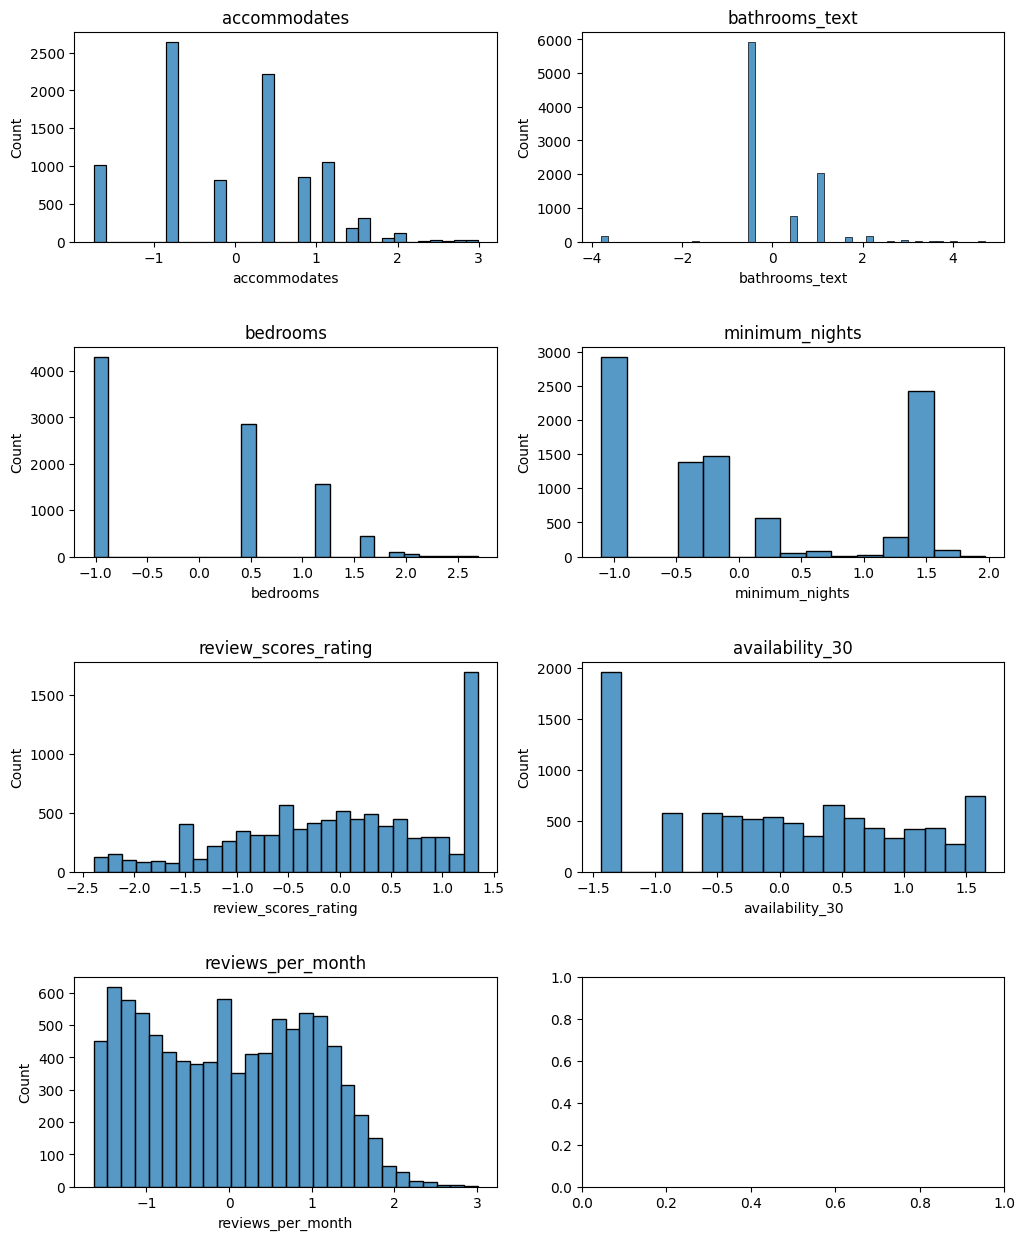

In [64]:
# Histograms after transformation

make_histograms(X_train_num_trans)

In [65]:
# Skewness after transforming

compute_skewness(X_train_num_trans)

Skewness of columns in the dataframe:

accommodates: 0.01
bathrooms_text: -0.08
bedrooms: 0.2
minimum_nights: 0.35
review_scores_rating: -0.35
availability_30: -0.06
reviews_per_month: 0.1


Now onto the categoricals

In [66]:
X_train_cat

,host_is_superhost,neighbourhood_group_cleansed,room_type
9406,f,Gracia,Entire home/apt
6673,f,Eixample,Private room
10685,t,Eixample,Private room
6112,f,Ciutat Vella,Entire home/apt
1680,f,Ciutat Vella,Entire home/apt
...,...,...,...
8631,f,Sants-Montjuic,Private room
9818,f,Sant Marti,Entire home/apt
10859,t,Sant Marti,Private room
4041,f,Sant Marti,Entire home/apt


In [67]:
# Defining function to calculate the conversion rate for an ordinal category based on a statistical metric of a numerical feature

def ordinal_cat_conversion_dict(df: pd.DataFrame, col_convert: str, col_value: str) -> dict:
    '''
    Creates a mapping dictionary to convert an ordinal category based on the values of a numerical feature.
    Inputs:
    - df: pandas DataFrame
    - col_convert: categorical value to convert
    - col_value: numerical column which serves as a basis for the conversion
    Outputs:
    - mapping dictionary
    '''
    grouped = df.groupby(col_convert)[col_value].median().sort_values(ascending=False)
    grouped_df = pd.DataFrame(grouped)
    grouped_df['proportion'] = grouped_df[col_value] / grouped_df[col_value].min()
    conv_list = list(grouped_df.index)
    value_list = list(grouped_df['proportion'])
    mapping_dict = dict(zip(conv_list, value_list))
    
    return mapping_dict

In [68]:
# Calculating neighbourhood category conversion based on average price of listings

mapping_neighbourhoods = ordinal_cat_conversion_dict(data_filtered, 'neighbourhood_group_cleansed', 'price')
mapping_neighbourhoods

{'Eixample': 3.6808510638297873,
 'Sarria-Sant Gervasi': 3.148936170212766,
 'Gracia': 3.106382978723404,
 'Les Corts': 2.9361702127659575,
 'Sant Marti': 2.765957446808511,
 'Sants-Montjuic': 2.148936170212766,
 'Ciutat Vella': 1.9787234042553192,
 'Horta-Guinardo': 1.4893617021276595,
 'Sant Andreu': 1.2765957446808511,
 'Nou Barris': 1.0}

In [69]:
# Encoding neighbourhood in X_train and X_test based on the previous conversion

X_train_cat['neighbourhood_group_cleansed'] = X_train_cat['neighbourhood_group_cleansed'].replace(mapping_neighbourhoods)
X_test_cat['neighbourhood_group_cleansed'] = X_test_cat['neighbourhood_group_cleansed'].replace(mapping_neighbourhoods)

print(X_train_cat['neighbourhood_group_cleansed'].unique())
print(X_test_cat['neighbourhood_group_cleansed'].unique())

[3.10638298 3.68085106 1.9787234  1.4893617  2.93617021 2.76595745
 2.14893617 1.         3.14893617 1.27659574]
[3.68085106 1.4893617  2.76595745 3.14893617 1.9787234  2.93617021
 2.14893617 3.10638298 1.27659574 1.        ]


In [70]:
# Calculating room_type category conversion based on average price of listings

mapping_roomtype = ordinal_cat_conversion_dict(data_filtered, 'room_type', 'price')
mapping_roomtype

{'Hotel room': 4.536585365853658,
 'Entire home/apt': 4.048780487804878,
 'Private room': 1.6097560975609757,
 'Shared room': 1.0}

In [71]:
# Encoding room type in X_train and X_test based on the previous conversion

X_train_cat['room_type'] = X_train_cat['room_type'].replace(mapping_roomtype)
X_test_cat['room_type'] = X_test_cat['room_type'].replace(mapping_roomtype)

print(X_train_cat['room_type'].unique())
print(X_test_cat['room_type'].unique())

[4.04878049 1.6097561  1.         4.53658537]
[4.04878049 1.6097561  1.         4.53658537]


In [72]:
# Replacing values in superhost column to make it binary

X_train_cat['host_is_superhost'] = X_train_cat['host_is_superhost'].replace({'t': 1, 'f': 0})
X_test_cat['host_is_superhost'] = X_test_cat['host_is_superhost'].replace({'t': 1, 'f': 0})

print(X_train_cat['host_is_superhost'].unique())
print(X_test_cat['host_is_superhost'].unique())

[0 1]
[0 1]


In [73]:
# Concatenating the transformed numerical dataframes with the categorical ones

X_train_merged = pd.concat([X_train_num_trans, X_train_cat], axis=1)
X_test_merged = pd.concat([X_test_num_trans, X_test_cat], axis=1)

print(X_train_merged.shape)
print(X_test_merged.shape)

(9331, 10)
(2333, 10)


In [74]:
# Scaling the features with minmaxscaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_new = scaler.fit_transform(X_train_merged)
X_train_new = pd.DataFrame(X_train_new, columns=X_train_merged.columns, index=X_train_merged.index)

X_test_new = scaler.transform(X_test_merged)
X_test_new = pd.DataFrame(X_test_new, columns=X_test_merged.columns, index=X_test_merged.index)

X_train_new.head()

,accommodates,bathrooms_text,bedrooms,minimum_nights,review_scores_rating,availability_30,reviews_per_month,host_is_superhost,neighbourhood_group_cleansed,room_type
9406,0.77,-0.49,0.51,-1.10,-2.34,0.88,-1.18,-0.57,0.33,0.65
6673,-1.74,0.44,-1.02,1.36,-0.43,1.58,0.09,-0.57,1.07,-1.51
10685,-0.79,-0.49,-1.02,-0.48,0.02,0.66,1.93,1.75,1.07,-1.51
6112,-0.79,-0.49,0.51,-0.12,-2.23,-1.44,-1.20,-0.57,-1.12,0.65
1680,0.77,-0.49,0.51,-1.10,-1.48,1.65,-1.56,-0.57,-1.12,0.65


In [75]:
# Saving scaler

path = "scalers/"
isExist = os.path.exists(path)
if not isExist:
    os.makedirs(path)
    print("The new directory is created!")

filename = "standardscaler.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(scaler, file)

## 6. Predicting the price of listings

In [76]:
# Defining function to train several models with default values

def regression_model_trainer(models: list, X_train, y_train) -> list:
    '''
    - Takes a list of models, X_train and y_train sets
    - Fits the models according to the data
    - Outputs a list with the trained models
    '''
    
    trained_models = []
    
    for model in models:
        if model == MLPRegressor():
            model.fit(X_train, y_train, random_state=13)
            trained_models.append(model)
        else:
            model.fit(X_train, y_train)
            trained_models.append(model)
    return trained_models

In [77]:
# Defining a function that creates a dataframe with the error metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

def error_metrics_df(y_test, y_test_pred, y_train, y_train_pred) -> pd.DataFrame:
    '''
    - Takes y_test values y_test predicted values, y_train values, y_train predicted values
    - Calculates error metrics (MAE, MSE, RMSE, MAPE, R2)
    - Outputs a dataframe with values for each metric and for each set
    '''
    
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
    test_r2score = r2_score(y_test, y_test_pred)
    test_metrics = [test_mae, test_mse, test_rmse, test_mape, test_r2score]
    
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
    train_r2score = r2_score(y_train, y_train_pred)
    train_metrics = [train_mae, train_mse, train_rmse, train_mape, train_r2score]
    
    df = pd.DataFrame(index=['MAE', 'MSE', 'RMSE', 'MAPE', 'R2'])
    df['test_value'] = test_metrics
    df['train_value'] = train_metrics
    
    return df

In [78]:
# Training different regression models

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

models = [LinearRegression(), KNeighborsRegressor(), MLPRegressor()]

trained_models = regression_model_trainer(models, X_train_new, y_train)
trained_models

C:\Users\Juan\Documents\Ironhack\Week_5\Mid_bootcamp_project\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[LinearRegression(), KNeighborsRegressor(), MLPRegressor()]

In [79]:
# Evaluating model performances

metrics_dfs = []

for model in trained_models:
    y_train_pred = model.predict(X_train_new)
    y_test_pred = model.predict(X_test_new)
    print(f'Error metrics for {model}:')
    display(error_metrics_df(y_test, y_test_pred, y_train, y_train_pred))
    print('\n')

Error metrics for LinearRegression():


,test_value,train_value
MAE,55.10,52.31
MSE,7558.06,6533.73
RMSE,86.94,80.83
MAPE,0.51,0.48
R2,0.49,0.50




Error metrics for KNeighborsRegressor():


,test_value,train_value
MAE,47.36,36.24
MSE,6196.16,3578.11
RMSE,78.72,59.82
MAPE,0.40,0.29
R2,0.58,0.73




Error metrics for MLPRegressor():


,test_value,train_value
MAE,48.13,44.62
MSE,6218.07,5213.20
RMSE,78.85,72.20
MAPE,0.42,0.38
R2,0.58,0.60


From the results above, we can see that the linear regression has the worst performance overall. The KNRegressor looks promising but looks like it is suffering from some overfitting and the MLPRegressor looks promising but will need some fine tuning:
- Let's optimize the hyperparameters of the KNN Regressor to explore the overfitting issue further
- Let's deep dive into the MLPRegressor to try and find the best possible model

In [80]:
# Let's explore the KNN option with a grid search

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 4, 5, 6, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],  # 1 for Manhattan distance (L1), 2 for Euclidean distance (L2)
}

# Creating model
knn = KNeighborsRegressor()

# Using GridSearchCV to perform grid search
grid_search = GridSearchCV(knn, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_new, y_train)

# Printing the best parameters and corresponding mean cross-validated score
print('Best Parameters: ', grid_search.best_params_)
print('Best MSE: ', -grid_search.best_score_)

Best Parameters:  {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Best MSE:  5068.40018906355


In [81]:
# Predicting values for train and test set and getting error metrics

best_model = grid_search.best_estimator_

y_train_pred = best_model.predict(X_train_new)
y_test_pred = best_model.predict(X_test_new)

error_metrics_df(y_test, y_test_pred, y_train, y_train_pred)

,test_value,train_value
MAE,45.59,0.06
MSE,5851.25,2.50
RMSE,76.49,1.58
MAPE,0.39,0.00
R2,0.60,1.00


In [82]:
# The KNN model is definitely suffering from heavy overfitting, let's explore the MLPRegressor

param_grid = {
    'hidden_layer_sizes': [(50,), (100,)],
    'alpha': [0.0001, 0.001],
}

# Creating model
mlp = MLPRegressor(verbose=True, max_iter=1000, solver='adam', activation='tanh', random_state=13)

# Using GridSearchCV to perform grid search
grid_search2 = GridSearchCV(mlp, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search2.fit(X_train_new, y_train)

# Printing the best parameters and corresponding mean cross-validated score
print('Best Parameters: ', grid_search2.best_params_)
print('Best MSE: ', -grid_search2.best_score_)

Iteration 1, loss = 18600.03737524
Iteration 2, loss = 18430.07478085
Iteration 3, loss = 18244.39564229
Iteration 4, loss = 18032.03584447
Iteration 5, loss = 17797.75777516
Iteration 6, loss = 17543.04454730
Iteration 7, loss = 17274.14522906
Iteration 8, loss = 16991.50217244
Iteration 9, loss = 16695.08833995
Iteration 10, loss = 16386.90842176
Iteration 11, loss = 16067.75454346
Iteration 12, loss = 15741.61823024
Iteration 13, loss = 15407.80304255
Iteration 14, loss = 15068.55175618
Iteration 15, loss = 14726.54373280
Iteration 16, loss = 14386.04644388
Iteration 17, loss = 14047.75345757
Iteration 18, loss = 13714.99862713
Iteration 19, loss = 13387.78035070
Iteration 20, loss = 13069.06679404
Iteration 21, loss = 12758.79247147
Iteration 22, loss = 12458.56897865
Iteration 23, loss = 12168.59631935
Iteration 24, loss = 11890.10792262
Iteration 25, loss = 11622.07780308
Iteration 26, loss = 11365.56087106
Iteration 27, loss = 11119.85762368
Iteration 28, loss = 10884.03674960
I

C:\Users\Juan\Documents\Ironhack\Week_5\Mid_bootcamp_project\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 18066.13588637
Iteration 3, loss = 17886.23686660
Iteration 4, loss = 17680.76301127
Iteration 5, loss = 17450.83568735
Iteration 6, loss = 17199.96001372
Iteration 7, loss = 16935.24491332
Iteration 8, loss = 16655.94739219
Iteration 9, loss = 16360.86537414
Iteration 10, loss = 16055.08732324
Iteration 11, loss = 15737.64351859
Iteration 12, loss = 15410.75040623
Iteration 13, loss = 15076.48613005
Iteration 14, loss = 14737.48143494
Iteration 15, loss = 14394.82514847
Iteration 16, loss = 14053.21392696
Iteration 17, loss = 13713.22141542
Iteration 18, loss = 13379.70864126
Iteration 19, loss = 13051.78051048
Iteration 20, loss = 12732.41943127
Iteration 21, loss = 12420.68612116
Iteration 22, loss = 12120.84421523
Iteration 23, loss = 11830.86533973
Iteration 24, loss = 11552.08132723
Iteration 25, loss = 11284.75987306
Iteration 26, loss = 11028.00824432
Iteration 27, loss = 10781.48105375
Iteration 28, loss = 10546.64480290
Iteration 29, loss = 10322.00050944


C:\Users\Juan\Documents\Ironhack\Week_5\Mid_bootcamp_project\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 17438.95512369
Iteration 6, loss = 17188.27936143
Iteration 7, loss = 16923.93610252
Iteration 8, loss = 16644.95273202
Iteration 9, loss = 16352.80363868
Iteration 10, loss = 16048.39496680
Iteration 11, loss = 15734.00593112
Iteration 12, loss = 15409.45209243
Iteration 13, loss = 15078.13019907
Iteration 14, loss = 14740.55180870
Iteration 15, loss = 14400.31433451
Iteration 16, loss = 14060.36985143
Iteration 17, loss = 13722.78805043
Iteration 18, loss = 13389.91297507
Iteration 19, loss = 13064.08997102
Iteration 20, loss = 12745.74032006
Iteration 21, loss = 12436.01542374
Iteration 22, loss = 12136.87718179
Iteration 23, loss = 11848.21865555
Iteration 24, loss = 11570.73983917
Iteration 25, loss = 11304.23040431
Iteration 26, loss = 11048.61599665
Iteration 27, loss = 10803.86559240
Iteration 28, loss = 10569.95350937
Iteration 29, loss = 10346.47151654
Iteration 30, loss = 10132.97188366
Iteration 31, loss = 9928.72534819
Iteration 32, loss = 9732.91459162

C:\Users\Juan\Documents\Ironhack\Week_5\Mid_bootcamp_project\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 11, loss = 15934.07542195
Iteration 12, loss = 15607.71057591
Iteration 13, loss = 15275.27789846
Iteration 14, loss = 14936.70829842
Iteration 15, loss = 14595.21221697
Iteration 16, loss = 14253.50971439
Iteration 17, loss = 13914.70864277
Iteration 18, loss = 13580.00540456
Iteration 19, loss = 13251.93683545
Iteration 20, loss = 12932.19755724
Iteration 21, loss = 12620.96500454
Iteration 22, loss = 12320.61883961
Iteration 23, loss = 12030.55909089
Iteration 24, loss = 11751.17422169
Iteration 25, loss = 11483.88686057
Iteration 26, loss = 11226.62050543
Iteration 27, loss = 10980.74242481
Iteration 28, loss = 10745.99430449
Iteration 29, loss = 10521.20040457
Iteration 30, loss = 10306.28537813
Iteration 31, loss = 10101.15220252
Iteration 32, loss = 9904.99703573
Iteration 33, loss = 9716.84562400
Iteration 34, loss = 9536.67160915
Iteration 35, loss = 9364.10739042
Iteration 36, loss = 9198.18772256
Iteration 37, loss = 9039.81750050
Iteration 38, loss = 8887.63818354

C:\Users\Juan\Documents\Ironhack\Week_5\Mid_bootcamp_project\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 18196.97938057
Iteration 2, loss = 18026.19462959
Iteration 3, loss = 17840.87757438
Iteration 4, loss = 17629.15029043
Iteration 5, loss = 17391.95384293
Iteration 6, loss = 17136.33468919
Iteration 7, loss = 16867.88596903
Iteration 8, loss = 16584.90933567
Iteration 9, loss = 16290.00704913
Iteration 10, loss = 15983.27633802
Iteration 11, loss = 15667.47939027
Iteration 12, loss = 15342.31798973
Iteration 13, loss = 15010.82998424
Iteration 14, loss = 14673.85585804
Iteration 15, loss = 14334.34301731
Iteration 16, loss = 13994.84268594
Iteration 17, loss = 13658.81653552
Iteration 18, loss = 13326.71338333
Iteration 19, loss = 13000.98325240
Iteration 20, loss = 12682.97388499
Iteration 21, loss = 12374.82735317
Iteration 22, loss = 12076.21468706
Iteration 23, loss = 11787.81702884
Iteration 24, loss = 11509.79522542
Iteration 25, loss = 11244.33518275
Iteration 26, loss = 10987.07403317
Iteration 27, loss = 10742.04638992
Iteration 28, loss = 10508.22511769
I

C:\Users\Juan\Documents\Ironhack\Week_5\Mid_bootcamp_project\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 7, loss = 16197.47957869
Iteration 8, loss = 15671.89463676
Iteration 9, loss = 15124.47729543
Iteration 10, loss = 14567.08139292
Iteration 11, loss = 13995.00735918
Iteration 12, loss = 13418.13689349
Iteration 13, loss = 12845.20764226
Iteration 14, loss = 12281.38900464
Iteration 15, loss = 11734.05504957
Iteration 16, loss = 11209.91541887
Iteration 17, loss = 10710.49621219
Iteration 18, loss = 10238.89032263
Iteration 19, loss = 9793.67775721
Iteration 20, loss = 9379.70686717
Iteration 21, loss = 8995.39408794
Iteration 22, loss = 8642.06904603
Iteration 23, loss = 8311.92745970
Iteration 24, loss = 8010.03968811
Iteration 25, loss = 7732.37242814
Iteration 26, loss = 7477.43957048
Iteration 27, loss = 7243.03164085
Iteration 28, loss = 7027.07336011
Iteration 29, loss = 6831.03918411
Iteration 30, loss = 6649.94124890
Iteration 31, loss = 6483.24376710
Iteration 32, loss = 6330.31756615
Iteration 33, loss = 6188.96140561
Iteration 34, loss = 6057.72590544
Iteration 3

C:\Users\Juan\Documents\Ironhack\Week_5\Mid_bootcamp_project\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 17623.12439029
Iteration 4, loss = 17247.81551020
Iteration 5, loss = 16823.57825533
Iteration 6, loss = 16361.75597857
Iteration 7, loss = 15867.19381213
Iteration 8, loss = 15343.77468846
Iteration 9, loss = 14799.64322672
Iteration 10, loss = 14240.61571866
Iteration 11, loss = 13668.51609426
Iteration 12, loss = 13093.38717950
Iteration 13, loss = 12518.63637448
Iteration 14, loss = 11954.19231796
Iteration 15, loss = 11408.01773021
Iteration 16, loss = 10881.87721695
Iteration 17, loss = 10379.35707938
Iteration 18, loss = 9910.12488263
Iteration 19, loss = 9465.78399844
Iteration 20, loss = 9054.87514702
Iteration 21, loss = 8672.45774985
Iteration 22, loss = 8317.61867598
Iteration 23, loss = 7990.59016648
Iteration 24, loss = 7690.15767424
Iteration 25, loss = 7414.01220740
Iteration 26, loss = 7160.73081818
Iteration 27, loss = 6928.73611624
Iteration 28, loss = 6714.14740102
Iteration 29, loss = 6519.05838325
Iteration 30, loss = 6341.29112735
Iteration 31

C:\Users\Juan\Documents\Ironhack\Week_5\Mid_bootcamp_project\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 18192.68096475
Iteration 2, loss = 17930.73538868
Iteration 3, loss = 17614.92562256
Iteration 4, loss = 17234.73279416
Iteration 5, loss = 16808.42806022
Iteration 6, loss = 16347.45269584
Iteration 7, loss = 15855.17154342
Iteration 8, loss = 15335.79873067
Iteration 9, loss = 14798.35150314
Iteration 10, loss = 14244.38945655
Iteration 11, loss = 13677.67218696
Iteration 12, loss = 13107.33048687
Iteration 13, loss = 12536.98746507
Iteration 14, loss = 11975.15229350
Iteration 15, loss = 11432.54268641
Iteration 16, loss = 10908.15896286
Iteration 17, loss = 10408.55531879
Iteration 18, loss = 9939.30498688
Iteration 19, loss = 9497.96734491
Iteration 20, loss = 9088.45193097
Iteration 21, loss = 8707.26487325
Iteration 22, loss = 8353.97520413
Iteration 23, loss = 8028.43662037
Iteration 24, loss = 7729.13961185
Iteration 25, loss = 7455.31689426
Iteration 26, loss = 7203.47655703
Iteration 27, loss = 6971.36189546
Iteration 28, loss = 6757.67343293
Iteration 29

C:\Users\Juan\Documents\Ironhack\Week_5\Mid_bootcamp_project\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 7, loss = 16061.02193447
Iteration 8, loss = 15536.82150762
Iteration 9, loss = 14993.72550111
Iteration 10, loss = 14434.09965385
Iteration 11, loss = 13863.96488980
Iteration 12, loss = 13289.42226488
Iteration 13, loss = 12716.23394996
Iteration 14, loss = 12151.07628718
Iteration 15, loss = 11605.51398839
Iteration 16, loss = 11078.52128152
Iteration 17, loss = 10576.53105291
Iteration 18, loss = 10104.62136854
Iteration 19, loss = 9662.00038883
Iteration 20, loss = 9250.89012005
Iteration 21, loss = 8867.50543229
Iteration 22, loss = 8513.14551707
Iteration 23, loss = 8184.49585802
Iteration 24, loss = 7883.62019764
Iteration 25, loss = 7607.10021260
Iteration 26, loss = 7353.58733265
Iteration 27, loss = 7119.95205504
Iteration 28, loss = 6904.04849025
Iteration 29, loss = 6708.63273903
Iteration 30, loss = 6528.00241051
Iteration 31, loss = 6362.73123903
Iteration 32, loss = 6209.68639643
Iteration 33, loss = 6069.65394454
Iteration 34, loss = 5941.38687411
Iteration 3

C:\Users\Juan\Documents\Ironhack\Week_5\Mid_bootcamp_project\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 7, loss = 15774.83856465
Iteration 8, loss = 15251.39604414
Iteration 9, loss = 14709.81501167
Iteration 10, loss = 14152.36389822
Iteration 11, loss = 13585.43822868
Iteration 12, loss = 13015.10585411
Iteration 13, loss = 12443.99642858
Iteration 14, loss = 11883.63629796
Iteration 15, loss = 11340.63325784
Iteration 16, loss = 10818.06131651
Iteration 17, loss = 10319.66554402
Iteration 18, loss = 9848.13928706
Iteration 19, loss = 9407.96581778
Iteration 20, loss = 8998.41170054
Iteration 21, loss = 8616.14012070
Iteration 22, loss = 8262.88135293
Iteration 23, loss = 7936.52535889
Iteration 24, loss = 7635.39765870
Iteration 25, loss = 7359.83035516
Iteration 26, loss = 7104.82561474
Iteration 27, loss = 6871.38252714
Iteration 28, loss = 6655.20855064
Iteration 29, loss = 6459.47940636
Iteration 30, loss = 6278.30082527
Iteration 31, loss = 6112.17187056
Iteration 32, loss = 5959.47870153
Iteration 33, loss = 5818.79749080
Iteration 34, loss = 5690.15975065
Iteration 35

C:\Users\Juan\Documents\Ironhack\Week_5\Mid_bootcamp_project\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 18244.39569149
Iteration 4, loss = 18032.03589653
Iteration 5, loss = 17797.75783097
Iteration 6, loss = 17543.04460747
Iteration 7, loss = 17274.14529261
Iteration 8, loss = 16991.50223708
Iteration 9, loss = 16695.08840336
Iteration 10, loss = 16386.90848329
Iteration 11, loss = 16067.75460372
Iteration 12, loss = 15741.61829092
Iteration 13, loss = 15407.80310599
Iteration 14, loss = 15068.55182496
Iteration 15, loss = 14726.54380961
Iteration 16, loss = 14386.04653132
Iteration 17, loss = 14047.75355806
Iteration 18, loss = 13714.99874248
Iteration 19, loss = 13387.78048233
Iteration 20, loss = 13069.06694279
Iteration 21, loss = 12758.79263779
Iteration 22, loss = 12458.56916315
Iteration 23, loss = 12168.59652258
Iteration 24, loss = 11890.10814510
Iteration 25, loss = 11622.07804532
Iteration 26, loss = 11365.56113349
Iteration 27, loss = 11119.85790674
Iteration 28, loss = 10884.03705348
Iteration 29, loss = 10658.61071905
Iteration 30, loss = 10443.53793819

C:\Users\Juan\Documents\Ironhack\Week_5\Mid_bootcamp_project\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 17450.83574305
Iteration 6, loss = 17199.96007359
Iteration 7, loss = 16935.24497616
Iteration 8, loss = 16655.94745553
Iteration 9, loss = 16360.86543599
Iteration 10, loss = 16055.08738283
Iteration 11, loss = 15737.64357640
Iteration 12, loss = 15410.75046398
Iteration 13, loss = 15076.48619021
Iteration 14, loss = 14737.48150012
Iteration 15, loss = 14394.82522158
Iteration 16, loss = 14053.21401050
Iteration 17, loss = 13713.22151199
Iteration 18, loss = 13379.70875296
Iteration 19, loss = 13051.78063893
Iteration 20, loss = 12732.41957740
Iteration 21, loss = 12420.68628541
Iteration 22, loss = 12120.84439820
Iteration 23, loss = 11830.86554172
Iteration 24, loss = 11552.08154889
Iteration 25, loss = 11284.76011478
Iteration 26, loss = 11028.00850652
Iteration 27, loss = 10781.48133676
Iteration 28, loss = 10546.64510681
Iteration 29, loss = 10322.00083428
Iteration 30, loss = 10107.73468008
Iteration 31, loss = 9902.55695702
Iteration 32, loss = 9705.47576141

C:\Users\Juan\Documents\Ironhack\Week_5\Mid_bootcamp_project\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 8, loss = 16644.95279636
Iteration 9, loss = 16352.80370135
Iteration 10, loss = 16048.39502678
Iteration 11, loss = 15734.00598890
Iteration 12, loss = 15409.45214981
Iteration 13, loss = 15078.13025864
Iteration 14, loss = 14740.55187322
Iteration 15, loss = 14400.31440686
Iteration 16, loss = 14060.36993425
Iteration 17, loss = 13722.78814625
Iteration 18, loss = 13389.91308594
Iteration 19, loss = 13064.09009850
Iteration 20, loss = 12745.74046496
Iteration 21, loss = 12436.01558653
Iteration 22, loss = 12136.87736310
Iteration 23, loss = 11848.21885598
Iteration 24, loss = 11570.74005934
Iteration 25, loss = 11304.23064479
Iteration 26, loss = 11048.61625778
Iteration 27, loss = 10803.86587450
Iteration 28, loss = 10569.95381243
Iteration 29, loss = 10346.47184061
Iteration 30, loss = 10132.97222858
Iteration 31, loss = 9928.72571376
Iteration 32, loss = 9732.91497758
Iteration 33, loss = 9545.77825998
Iteration 34, loss = 9366.85343880
Iteration 35, loss = 9195.13878191

C:\Users\Juan\Documents\Ironhack\Week_5\Mid_bootcamp_project\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 8, loss = 16850.95707412
Iteration 9, loss = 16556.93747193
Iteration 10, loss = 16250.56892876
Iteration 11, loss = 15934.07547998
Iteration 12, loss = 15607.71063382
Iteration 13, loss = 15275.27795885
Iteration 14, loss = 14936.70836401
Iteration 15, loss = 14595.21229055
Iteration 16, loss = 14253.50979853
Iteration 17, loss = 13914.70873991
Iteration 18, loss = 13580.00551675
Iteration 19, loss = 13251.93696414
Iteration 20, loss = 12932.19770338
Iteration 21, loss = 12620.96516864
Iteration 22, loss = 12320.61902235
Iteration 23, loss = 12030.55929279
Iteration 24, loss = 11751.17444326
Iteration 25, loss = 11483.88710243
Iteration 26, loss = 11226.62076780
Iteration 27, loss = 10980.74270808
Iteration 28, loss = 10745.99460871
Iteration 29, loss = 10521.20072972
Iteration 30, loss = 10306.28572410
Iteration 31, loss = 10101.15256911
Iteration 32, loss = 9904.99742272
Iteration 33, loss = 9716.84603113
Iteration 34, loss = 9536.67203618
Iteration 35, loss = 9364.1078372

C:\Users\Juan\Documents\Ironhack\Week_5\Mid_bootcamp_project\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 10, loss = 15983.27639862
Iteration 11, loss = 15667.47944947
Iteration 12, loss = 15342.31804954
Iteration 13, loss = 15010.83004726
Iteration 14, loss = 14673.85592702
Iteration 15, loss = 14334.34309499
Iteration 16, loss = 13994.84277485
Iteration 17, loss = 13658.81663778
Iteration 18, loss = 13326.71350070
Iteration 19, loss = 13000.98338619
Iteration 20, loss = 12682.97403607
Iteration 21, loss = 12374.82752200
Iteration 22, loss = 12076.21487414
Iteration 23, loss = 11787.81723453
Iteration 24, loss = 11509.79545017
Iteration 25, loss = 11244.33542709
Iteration 26, loss = 10987.07429735
Iteration 27, loss = 10742.04667439
Iteration 28, loss = 10508.22542265
Iteration 29, loss = 10283.44408107
Iteration 30, loss = 10068.64237403
Iteration 31, loss = 9863.79369957
Iteration 32, loss = 9667.10443107
Iteration 33, loss = 9478.64626559
Iteration 34, loss = 9298.11044823
Iteration 35, loss = 9124.88725748
Iteration 36, loss = 8958.86504581
Iteration 37, loss = 8800.20220609

C:\Users\Juan\Documents\Ironhack\Week_5\Mid_bootcamp_project\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 18558.88859179
Iteration 2, loss = 18294.37335574
Iteration 3, loss = 17974.84186329
Iteration 4, loss = 17592.35846895
Iteration 5, loss = 17162.60968535
Iteration 6, loss = 16695.99092978
Iteration 7, loss = 16197.47965803
Iteration 8, loss = 15671.89471927
Iteration 9, loss = 15124.47738014
Iteration 10, loss = 14567.08148006
Iteration 11, loss = 13995.00745156
Iteration 12, loss = 13418.13699596
Iteration 13, loss = 12845.20775994
Iteration 14, loss = 12281.38914277
Iteration 15, loss = 11734.05521148
Iteration 16, loss = 11209.91560673
Iteration 17, loss = 10710.49642745
Iteration 18, loss = 10238.89056629
Iteration 19, loss = 9793.67803020
Iteration 20, loss = 9379.70717023
Iteration 21, loss = 8995.39442134
Iteration 22, loss = 8642.06940972
Iteration 23, loss = 8311.92785343
Iteration 24, loss = 8010.04011114
Iteration 25, loss = 7732.37287999
Iteration 26, loss = 7477.44005055
Iteration 27, loss = 7243.03214860
Iteration 28, loss = 7027.07389521
Iteration 2

C:\Users\Juan\Documents\Ironhack\Week_5\Mid_bootcamp_project\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 17936.31735855
Iteration 3, loss = 17623.12445022
Iteration 4, loss = 17247.81557564
Iteration 5, loss = 16823.57832744
Iteration 6, loss = 16361.75605596
Iteration 7, loss = 15867.19389340
Iteration 8, loss = 15343.77477215
Iteration 9, loss = 14799.64331192
Iteration 10, loss = 14240.61580541
Iteration 11, loss = 13668.51618519
Iteration 12, loss = 13093.38728008
Iteration 13, loss = 12518.63649069
Iteration 14, loss = 11954.19245494
Iteration 15, loss = 11408.01789129
Iteration 16, loss = 10881.87740436
Iteration 17, loss = 10379.35729468
Iteration 18, loss = 9910.12512659
Iteration 19, loss = 9465.78427215
Iteration 20, loss = 9054.87545111
Iteration 21, loss = 8672.45808469
Iteration 22, loss = 8317.61904123
Iteration 23, loss = 7990.59056167
Iteration 24, loss = 7690.15809875
Iteration 25, loss = 7414.01266057
Iteration 26, loss = 7160.73129955
Iteration 27, loss = 6928.73662514
Iteration 28, loss = 6714.14793713
Iteration 29, loss = 6519.05894619
Iteration 30

C:\Users\Juan\Documents\Ironhack\Week_5\Mid_bootcamp_project\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 6, loss = 16347.45277559
Iteration 7, loss = 15855.17162640
Iteration 8, loss = 15335.79881491
Iteration 9, loss = 14798.35158752
Iteration 10, loss = 14244.38954128
Iteration 11, loss = 13677.67227529
Iteration 12, loss = 13107.33058465
Iteration 13, loss = 12536.98757839
Iteration 14, loss = 11975.15242744
Iteration 15, loss = 11432.54284421
Iteration 16, loss = 10908.15914689
Iteration 17, loss = 10408.55553041
Iteration 18, loss = 9939.30522714
Iteration 19, loss = 9497.96761499
Iteration 20, loss = 9088.45223158
Iteration 21, loss = 8707.26520479
Iteration 22, loss = 8353.97556641
Iteration 23, loss = 8028.43701293
Iteration 24, loss = 7729.14003395
Iteration 25, loss = 7455.31734531
Iteration 26, loss = 7203.47703645
Iteration 27, loss = 6971.36240270
Iteration 28, loss = 6757.67396746
Iteration 29, loss = 6562.60326243
Iteration 30, loss = 6384.54517403
Iteration 31, loss = 6219.86334677
Iteration 32, loss = 6069.02159686
Iteration 33, loss = 5930.84215117
Iteration 34

C:\Users\Juan\Documents\Ironhack\Week_5\Mid_bootcamp_project\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 6, loss = 16557.46355454
Iteration 7, loss = 16061.02201659
Iteration 8, loss = 15536.82159150
Iteration 9, loss = 14993.72558591
Iteration 10, loss = 14434.09974013
Iteration 11, loss = 13863.96498028
Iteration 12, loss = 13289.42236544
Iteration 13, loss = 12716.23406639
Iteration 14, loss = 12151.07642450
Iteration 15, loss = 11605.51414976
Iteration 16, loss = 11078.52146924
Iteration 17, loss = 10576.53126819
Iteration 18, loss = 10104.62161247
Iteration 19, loss = 9662.00066250
Iteration 20, loss = 9250.89042418
Iteration 21, loss = 8867.50576708
Iteration 22, loss = 8513.14588227
Iteration 23, loss = 8184.49625325
Iteration 24, loss = 7883.62062216
Iteration 25, loss = 7607.10066588
Iteration 26, loss = 7353.58781418
Iteration 27, loss = 7119.95256433
Iteration 28, loss = 6904.04902683
Iteration 29, loss = 6708.63330249
Iteration 30, loss = 6528.00300072
Iteration 31, loss = 6362.73185584
Iteration 32, loss = 6209.68704007
Iteration 33, loss = 6069.65461512
Iteration 3

C:\Users\Juan\Documents\Ironhack\Week_5\Mid_bootcamp_project\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 8, loss = 15251.39612666
Iteration 9, loss = 14709.81509671
Iteration 10, loss = 14152.36398634
Iteration 11, loss = 13585.43832217
Iteration 12, loss = 13015.10595799
Iteration 13, loss = 12443.99654848
Iteration 14, loss = 11883.63643873
Iteration 15, loss = 11340.63342273
Iteration 16, loss = 10818.06150777
Iteration 17, loss = 10319.66576265
Iteration 18, loss = 9848.13953403
Iteration 19, loss = 9407.96609407
Iteration 20, loss = 8998.41200690
Iteration 21, loss = 8616.14045738
Iteration 22, loss = 8262.88171990
Iteration 23, loss = 7936.52575577
Iteration 24, loss = 7635.39808493
Iteration 25, loss = 7359.83081017
Iteration 26, loss = 7104.82609816
Iteration 27, loss = 6871.38303852
Iteration 28, loss = 6655.20908957
Iteration 29, loss = 6459.47997253
Iteration 30, loss = 6278.30141856
Iteration 31, loss = 6112.17249094
Iteration 32, loss = 5959.47934924
Iteration 33, loss = 5818.79816612
Iteration 34, loss = 5690.16045401
Iteration 35, loss = 5570.02793235
Iteration 36

C:\Users\Juan\Documents\Ironhack\Week_5\Mid_bootcamp_project\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 6, loss = 15783.34881687
Iteration 7, loss = 15126.75759812
Iteration 8, loss = 14442.84762043
Iteration 9, loss = 13741.52333384
Iteration 10, loss = 13030.32983258
Iteration 11, loss = 12326.38114965
Iteration 12, loss = 11643.09060598
Iteration 13, loss = 10990.71855355
Iteration 14, loss = 10375.86185702
Iteration 15, loss = 9804.24484451
Iteration 16, loss = 9276.53618501
Iteration 17, loss = 8794.51603901
Iteration 18, loss = 8358.55257173
Iteration 19, loss = 7962.99733516
Iteration 20, loss = 7607.32623699
Iteration 21, loss = 7286.63955462
Iteration 22, loss = 6999.79573286
Iteration 23, loss = 6739.66181138
Iteration 24, loss = 6506.97216915
Iteration 25, loss = 6297.23019078
Iteration 26, loss = 6109.17258832
Iteration 27, loss = 5939.04188369
Iteration 28, loss = 5785.36726380
Iteration 29, loss = 5645.68626322
Iteration 30, loss = 5518.10343359
Iteration 31, loss = 5401.14631032
Iteration 32, loss = 5293.75841664
Iteration 33, loss = 5193.79042263
Iteration 34, l

C:\Users\Juan\Documents\Ironhack\Week_5\Mid_bootcamp_project\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [83]:
# Evaluate the best MLPRegressor model on the test set
# Best params: activation='tahn', alpha=0.0001, hidden_layer_sizes=(100,), max_iter=1000, solver=adam

best_model2 = grid_search2.best_estimator_

y_train_pred = best_model2.predict(X_train_new)
y_test_pred = best_model2.predict(X_test_new)

error_metrics_df(y_test, y_test_pred, y_train, y_train_pred)

,test_value,train_value
MAE,46.54,40.92
MSE,5918.31,4386.71
RMSE,76.93,66.23
MAPE,0.39,0.34
R2,0.60,0.67


In [84]:
# Saving models

path = "models/"
isExist = os.path.exists(path)
if not isExist:
    os.makedirs(path)
    print("The new directory is created!")

filename = "KNNRegressor.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(best_model, file)

filename = "MLPRegressor.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(best_model2, file)

Saving functions to functions.py file

In [91]:
file_path = 'src/lib/functions.py'

In [92]:
%%writefile $file_path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from unidecode import unidecode
import scipy.stats as st
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant



def snakecase_columns(df: pd.DataFrame) -> pd.DataFrame:
    
    '''
    Converts the name of a columns of a dataframe to snakecase (lowercase with '_' instead of white spaces), and replaces any instance of neighborhood      with neighbourhood (for consistency)
    Input: pd.DataFrame
    Output: pd.DataFrame with snakecase column names
    '''

    snakecase_cols = []

    for col in df.columns:
        col = col.lower().replace(' ', '_')
        col = col.replace('neighborhood', 'neighbourhood')
        snakecase_cols.append(col)

    df.columns = snakecase_cols

    return df



def remove_accents(input: str) -> str:
    '''
    Removes accents and other letter punctuation symbols for letters and returns the converted string.
    '''
    return unidecode(input)



def remove_percent_div_100(input_str: str) -> float:
    '''
    Takes a string, removes the % symbol, converts it to a float and divides it by 100.
    '''
    if isinstance(input_str, str):
        converted_value = input_str.replace('%', '')
        divided_value = float(converted_value) / 100
    else:
        return input_str
    return divided_value



def remove_dollar_symbol_commas(input_str: str) -> float:
    '''
    Takes a string, removes the $ symbol and converts it to a float.
    '''
    if isinstance(input_str, str):
        no_dollar = input_str.replace('$', '')
        no_comma = no_dollar.replace(',', '')
        float_val = float(no_comma)
    else:
        return input_str
    return float_val



def plot_histograms(df, col_filter, col_plot, categories, bins=75, figsize=(12, 15), sharex=False, sharey=False):
    
    """
    Plot Seaborn histograms in a grid for different categories.
    Inputs:
    - df: DataFrame containing the data
    - col_filter: Column in the DataFrame for which the category filter will be done
    - col_plot: Column in the DataFrame for which histograms will be plotted
    - categories: List of unique values in the column for which histograms will be plotted
    - bins: Number of bins for histograms (default is 75)
    - figsize: size of the figure (default is 12, 25)
    """
    
    num_categories = len(categories)

    if num_categories == 2:
        fig, axes = plt.subplots(1, 2, figsize=figsize, sharex=sharex, sharey=sharey)
    else:
        num_rows = num_categories // 2
        num_cols = 2 if num_categories % 2 == 0 else 1

        fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize, sharex=sharex, sharey=sharey)
        fig.subplots_adjust(hspace=0.5)

    for i, category in enumerate(categories):
        if num_categories == 2:
            sns.histplot(df[df[col_filter] == category][col_plot], bins=bins, ax=axes[i])
            axes[i].set_title(category)
        else:
            sns.histplot(df[df[col_filter] == category][col_plot], bins=bins, ax=axes[i // 2, i % 2])
            axes[i // 2, i % 2].set_title(category)

    plt.show()



def make_histograms(df: pd.DataFrame, figsize=(12, 15)):
    
    """
    Takes a dataframe and creates histograms for all the columns.
    Parameters:
    - df: DataFrame
    - figsize: Modifies the size of the plotting figure (default (12, 15))
    """
    
    num_cols = 2
    total_cols = len(df.columns)
    num_rows = (total_cols + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    fig.subplots_adjust(hspace=0.5)

    for i, col in enumerate(df.columns):
        row_idx = i // num_cols
        col_idx = i % num_cols
        sns.histplot(x=df[col], data=df, ax=axes[row_idx, col_idx]) 
        axes[row_idx, col_idx].set_title(col)

    plt.show()



def compute_skewness(df: pd.DataFrame, threshold: int=-1):
    
    '''
    Computes and prints the skewness of the columns in a dataframe.
    Inputs: pandas DataFrame
    '''
    
    print('Skewness of columns in the dataframe:\n')
    
    for col in df.columns:
        if st.skew(df[col]) > abs(threshold) or st.skew(df[col]) < threshold:
            print(f'{col}: {round(st.skew(df[col]), 2)} -> Out of threshold')
        else:
            print(f'{col}: {round(st.skew(df[col]), 2)}')



def compute_vif(df: pd.DataFrame, columns: list):

    X = df.loc[:, columns]
    # the calculation of variance inflation requires a constant
    X.loc[:,'intercept'] = 1

    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.loc[vif['Variable']!='intercept'].sort_values('VIF', ascending=False).reset_index(drop=True)
    return vif



def make_countplots(df: pd.DataFrame, figsize=(12, 15)):
    
    """
    Takes a dataframe and creates countplots for all the columns.
    If the column has more than 5 categories, the data goes in the y axis.
    Bars are arranged in descending order based on count.
    Parameters:
    - df: DataFrame
    - figsize: Modifies the size of the plotting figure (default (12, 15))
    """
    
    num_cols = 2
    total_cols = len(df.columns)
    num_rows = (total_cols + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    fig.subplots_adjust(hspace=0.5)

    for i, col in enumerate(df.columns):
        row_idx = i // num_cols
        col_idx = i % num_cols

        if df[col].nunique() > 5:
            order = df[col].value_counts().index
            sns.countplot(y=df[col], data=df, ax=axes[row_idx, col_idx], hue=df[col], palette='Set2', order=order)
        else:
            order = df[col].value_counts().index
            sns.countplot(x=df[col], data=df, ax=axes[row_idx, col_idx], hue=df[col], palette='Set2', order=order)

        axes[row_idx, col_idx].set_title(col)
        axes[row_idx, col_idx].set_xlabel('Count' if df[col].nunique() <= 5 else 'Frequency')
        axes[row_idx, col_idx].set_ylabel('Categories' if df[col].nunique() > 5 else 'Count')

    plt.show()



def ordinal_cat_conversion_dict(df: pd.DataFrame, col_convert: str, col_value: str) -> dict:
    '''
    Creates a mapping dictionary to convert an ordinal category based on the values of a numerical feature.
    Inputs:
    - df: pandas DataFrame
    - col_convert: categorical value to convert
    - col_value: numerical column which serves as a basis for the conversion
    Outputs:
    - mapping dictionary
    '''
    grouped = df.groupby(col_convert)[col_value].median().sort_values(ascending=False)
    grouped_df = pd.DataFrame(grouped)
    grouped_df['proportion'] = grouped_df[col_value] / grouped_df[col_value].min()
    conv_list = list(grouped_df.index)
    value_list = list(grouped_df['proportion'])
    mapping_dict = dict(zip(conv_list, value_list))
    
    return mapping_dict



def regression_model_trainer(models: list, X_train, y_train) -> list:
    '''
    - Takes a list of models, X_train and y_train sets
    - Fits the models according to the data
    - Outputs a list with the trained models
    '''
    
    trained_models = []
    
    for model in models:
        if model == MLPRegressor():
            model.fit(X_train, y_train, random_state=13)
            trained_models.append(model)
        else:
            model.fit(X_train, y_train)
            trained_models.append(model)
    return trained_models



def error_metrics_df(y_test, y_test_pred, y_train, y_train_pred) -> pd.DataFrame:
    '''
    - Takes y_test values y_test predicted values, y_train values, y_train predicted values
    - Calculates error metrics (MAE, MSE, RMSE, MAPE, R2)
    - Outputs a dataframe with values for each metric and for each set
    '''
    
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
    test_r2score = r2_score(y_test, y_test_pred)
    test_metrics = [test_mae, test_mse, test_rmse, test_mape, test_r2score]
    
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
    train_r2score = r2_score(y_train, y_train_pred)
    train_metrics = [train_mae, train_mse, train_rmse, train_mape, train_r2score]
    
    df = pd.DataFrame(index=['MAE', 'MSE', 'RMSE', 'MAPE', 'R2'])
    df['test_value'] = test_metrics
    df['train_value'] = train_metrics
    
    return df

Writing src/lib/functions.py
